In [24]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta

pd.set_option('display.max_rows', 1000)

from datetime import datetime
import sys
sys.path.append("../")
from utils import createXYPlot
from utils import getVariables

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#from sklearn.metrics import mean_squared_error, mean_absolute_error

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

### Get data

In [25]:
path = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(path)

In [26]:
df.columns

Index(['data', 'stato', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido'],
      dtype='object')

In [27]:
df[["data","casi_da_sospetto_diagnostico"]].head(1)

data  casi_da_sospetto_diagnostico
0  2020-02-24T18:00:00                           NaN

### Funzioni

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
    
# tick on mondays every week
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

    
def createBarPlot(dfplot,y,x="giorno",
                  yerr=None, 
                  title_suffix="", 
                  logscale=False, figwidth=10):

    fig, ax = plt.subplots(figsize=(figwidth,6))

    plt.bar(dfplot[x], dfplot[y],yerr=yerr)
    plt.grid()
    plt.title(f"{y} {title_suffix}",fontsize=16)
    plt.xticks(fontsize=14,
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right"
              )
    plt.yticks(fontsize=14)
    if logscale: plt.yscale("log")
    plt.show()
    plt.close()
    
    
def multiple_plot(df, yname, brkdwn, xname = "giorno", lista_nomi = ["Lombardia","Piemonte"], title_suffix = "",
                  limit_x=None, limit_y=None):
    
    fig, ax = plt.subplots(figsize=(12,8))

    years = mdates.YearLocator()    # every year
    months = mdates.MonthLocator()  # every month
    weekdays = mdates.WeekdayLocator(byweekday=MO)
    days = mdates.DayLocator()
    years_fmt = mdates.DateFormatter('%Y-%m-%d')


    # format the ticks
    ax.xaxis.set_major_locator(weekdays)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(days)

    for nome in lista_nomi:
        dfp = df[df[brkdwn]==nome]
        plt.plot(dfp[xname],dfp[yname],"-o",label=nome)

    #print(dfp.reset_index()[0])
    #plt.plot(dfp['giorno'],dfp["expected"],"-o")
    
    plt.grid(which="both")
    fig.autofmt_xdate()
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    plt.xticks(fontsize=14)
    if limit_x: plt.xlim(limit_x[0],limit_x[1])
    if limit_y: plt.ylim(limit_y[0],limit_y[1])
    plt.yticks(fontsize=14)
    plt.legend(fontsize=12)
    plt.title(f"{yname} per {brkdwn} {title_suffix}", fontsize=18)

    plt.show()
    plt.close()
    

    
    
def get_provinces_by_regio(regione):
    return [ x for x in list(df_prov[df_prov["denominazione_regione"]==regione]["denominazione_provincia"].unique()) if "aggiornamento" not in x ]



def plot_summary(dfplot, suffix):
    fig, ax = plt.subplots(figsize=(16,8),dpi=300)

    years = mdates.YearLocator()    # every year
    months = mdates.MonthLocator()  # every month
    weekdays = mdates.WeekdayLocator(byweekday=MO)
    days = mdates.DayLocator()
    years_fmt = mdates.DateFormatter('%Y-%m-%d')

    WIDTH=0.35
    DAY_INTERVAL = 14

    df_bar = dfplot.sort_values(by="data",ascending=True).reset_index()
    
    #print(df_bar.head())
    
    indexes = np.arange(0,len(df_bar.index),DAY_INTERVAL)
    labels = [ str(df_bar["giorno"].tolist()[i]) for i in indexes]

    #print(labels)

    plt.bar(df_bar.index,df_bar["nuovi_positivi"],label="contagiati",alpha=0.5,width=WIDTH,color="red",align="center")
    plt.bar(df_bar.index-WIDTH,df_bar["variazione_deceduti"],label="deceduti",alpha=0.6,width=WIDTH,color="black",align="center")
    plt.bar(df_bar.index+WIDTH,df_bar["variazione_guariti"],label="guariti",alpha=0.6,width=WIDTH,color="green",align="center")
    plt.plot(df_bar.index,df_bar["nuovi_positivi_media_7"],label="contagiati (media mobile)", linewidth=3,color="darkred")

    plt.xticks(indexes,
               labels = labels, 
               fontsize=15, 
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right",
              )
    plt.title(f"Aggiornamento {suffix}",fontsize=20)
    plt.legend(fontsize=14,loc="upper left")
    plt.yticks(fontsize=15)
    plt.savefig(f"./plots/{oggi}/aggiornamento_{suffix}.png",bbox_inches="tight")
    del(fig)

### Valori nazionali

In [29]:
df = getVariables(df)
oggi = df["giorno"][0]
print(oggi)

import subprocess
plots_folder = f"./plots/{oggi}"
print(plots_folder)
res = subprocess.run(f"mkdir -p {plots_folder}",shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

2022-04-26
./plots/2022-04-26


/home/antonio/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


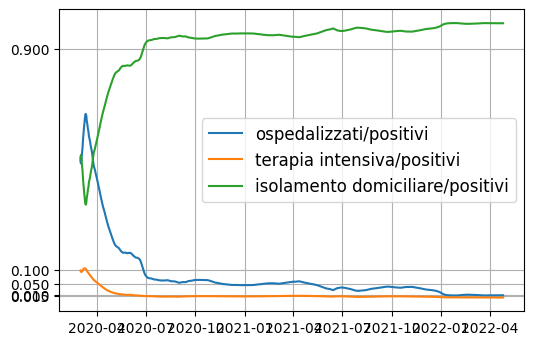

In [30]:
plt.figure(dpi=100)
plt.plot(df["giorno"],df["frazione_ospedalizzati_media_7"],label="ospedalizzati/positivi")
plt.plot(df["giorno"],df["frazione_terapia_intensiva_media_7"],label="terapia intensiva/positivi")
plt.plot(df["giorno"],df["frazione_isolamento_domiciliare_media_7"],label="isolamento domiciliare/positivi")
plt.grid()
plt.legend()
plt.grid()
_=plt.yticks([0.005,0.01,0.05,0.1,0.9])

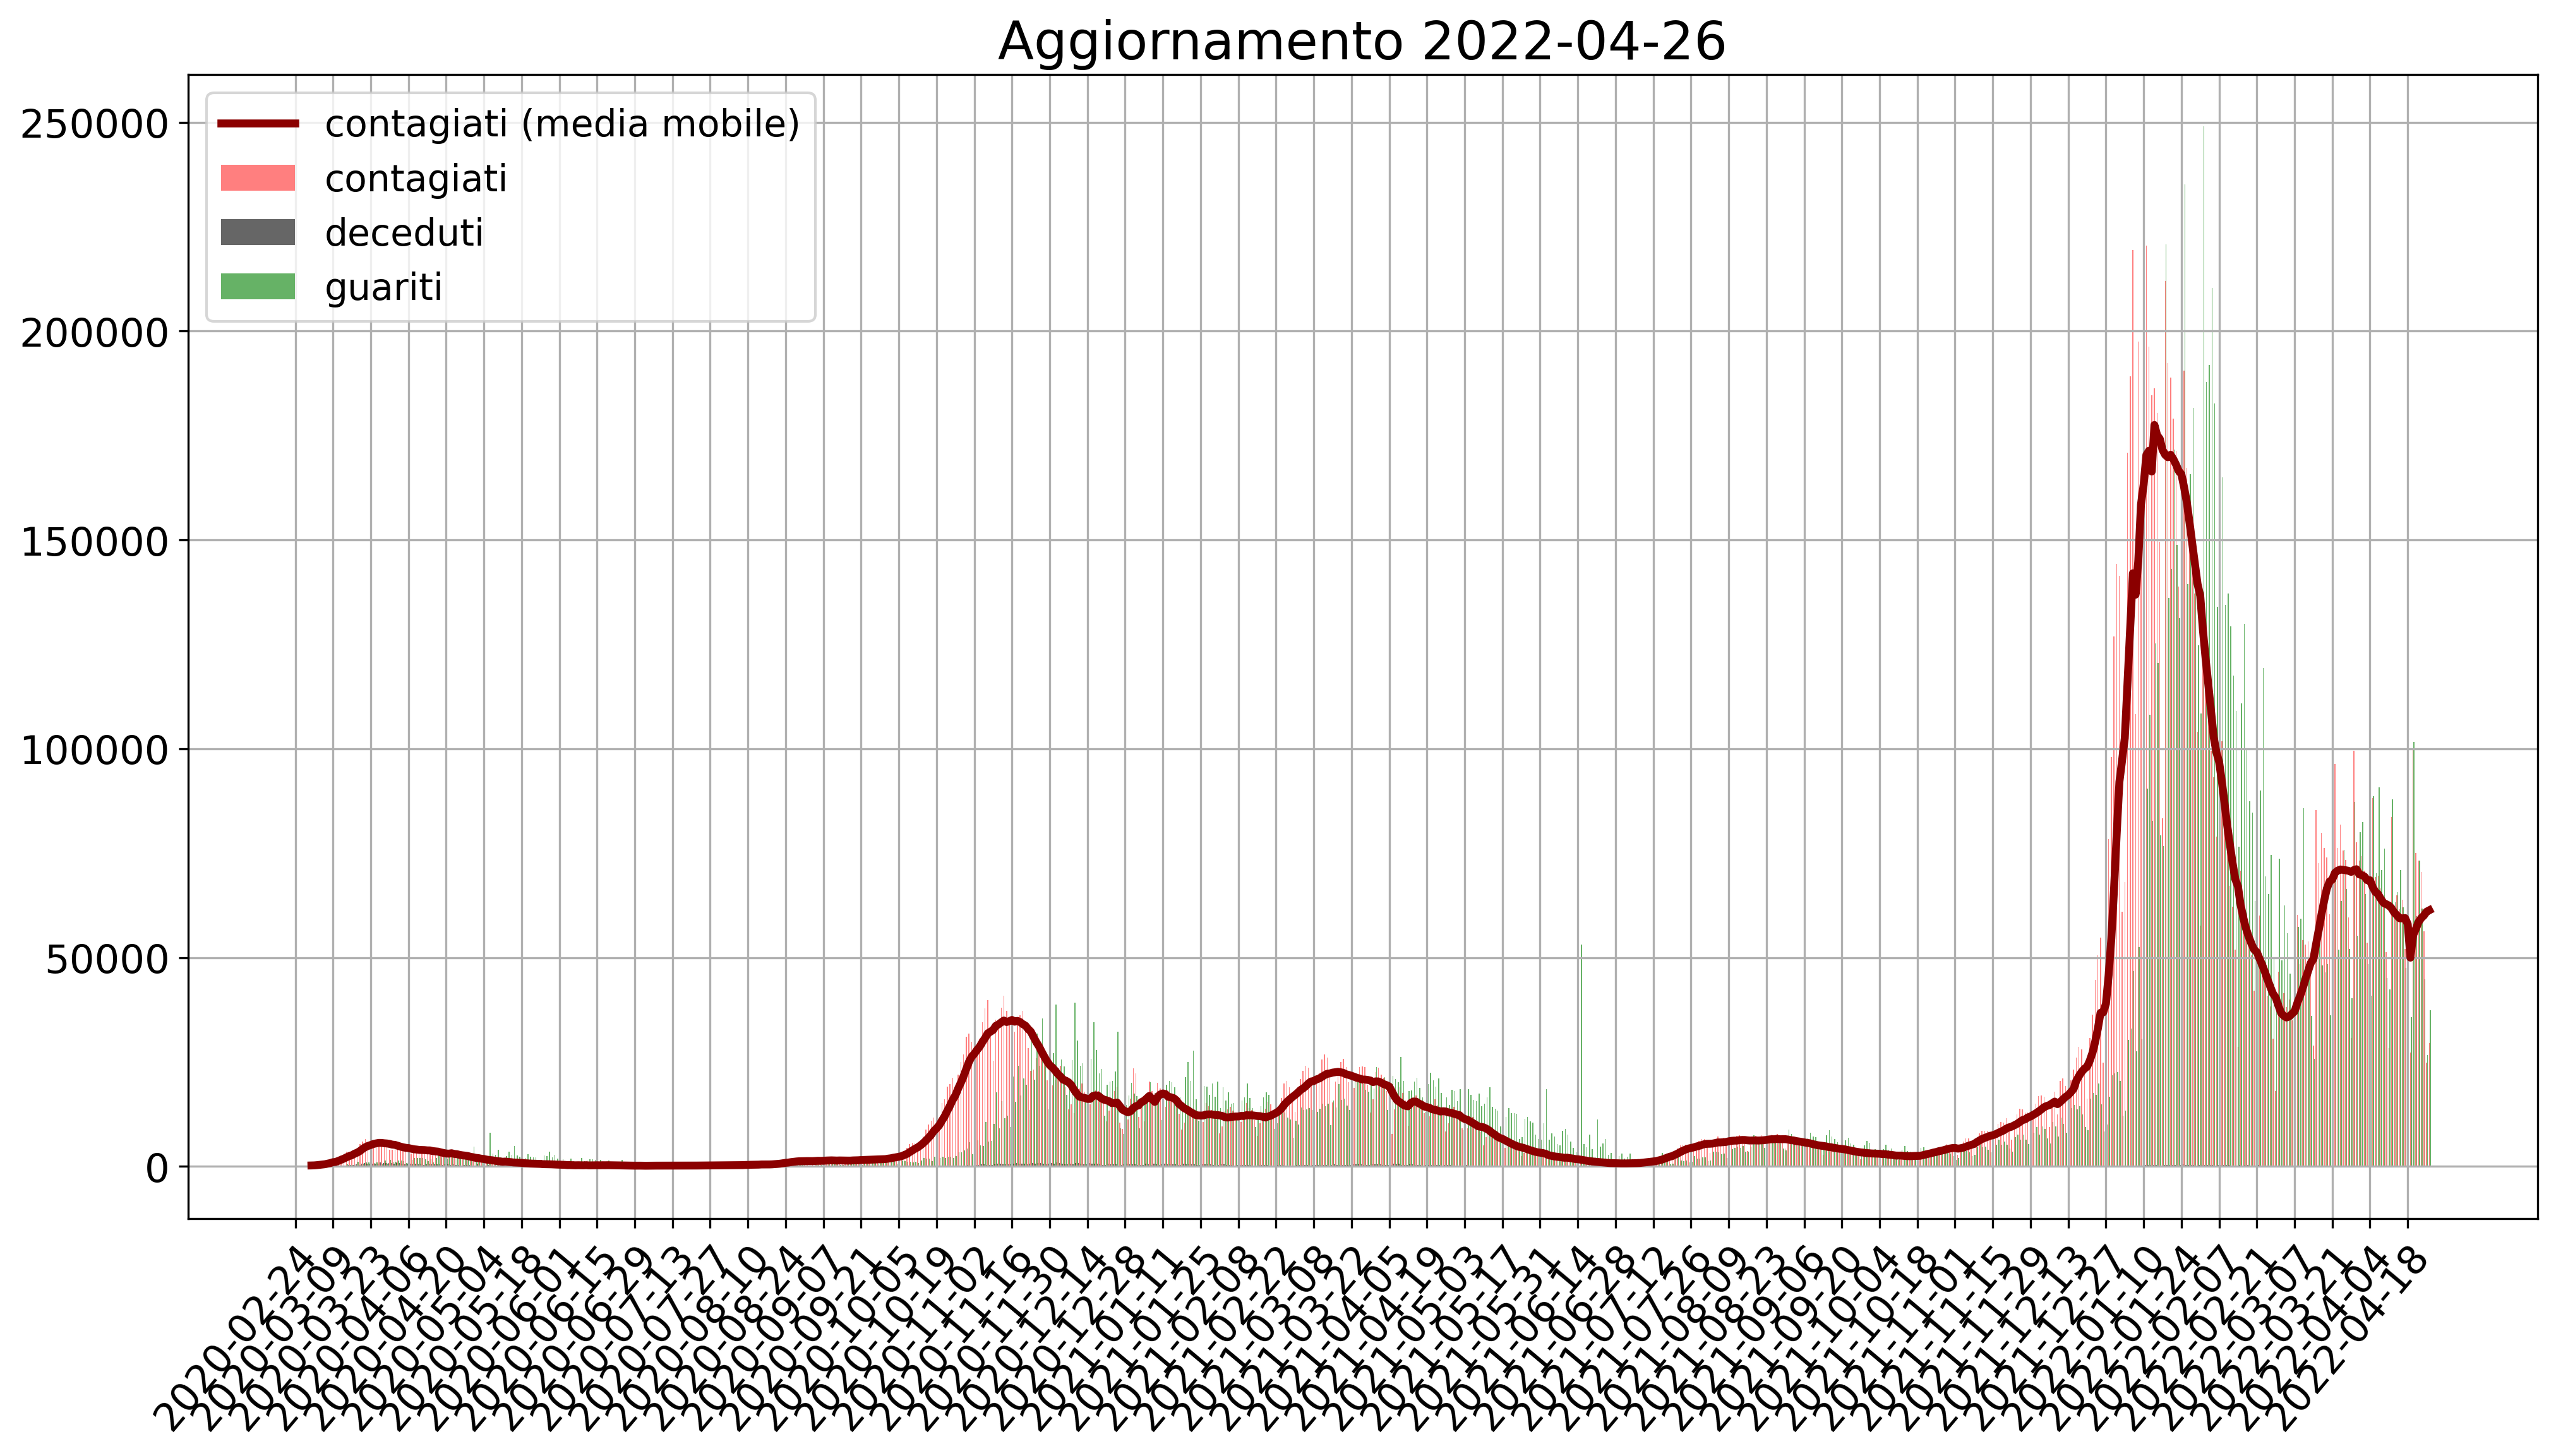

In [31]:
plot_summary(df, suffix=oggi)

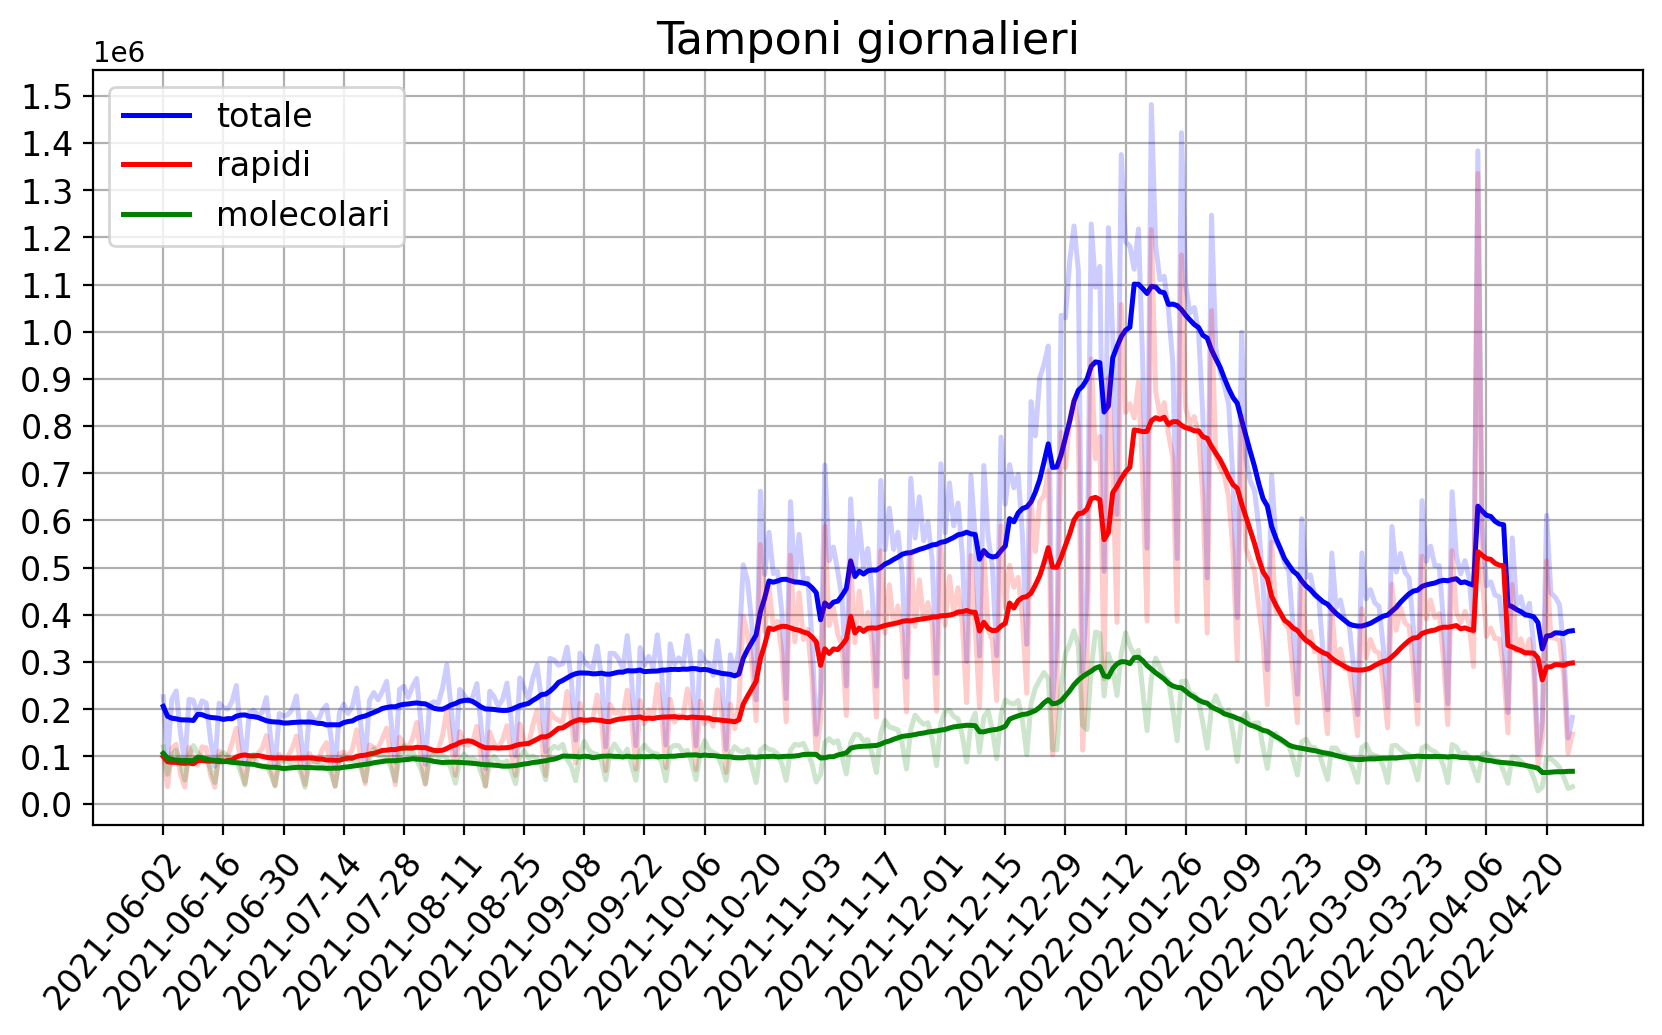

In [32]:
createXYPlot(df,
             days_interval = 14,
             bar_width=0.75,
             dpis=200,
             linewidth=1.8,
             y=["variazione_tamponi",
                "variazione_tamponi_media_7",
                "variazione_tamponi_rapidi",
                "variazione_tamponi_rapidi_media_7",
                "variazione_tamponi_molecolari",
                "variazione_tamponi_molecolari_media_7",
               ],
             alphas=[0.2,1.0,0.2,1.0,0.2,1.0],
             colors=["b","b","r","r","g","g"],
             labels=[None,
                     "totale",
                     None,
                     "rapidi",
                     None,
                     "molecolari"
                    ],
             x="giorno",
             plots_folder=plots_folder,
             savename="tamponi.png",
             figsize_x=10,
             figsize_y=5,
             start_date="2021-06-01",
             title="Tamponi giornalieri",
             yticks=np.arange(0,1.6e6,1e5))

In [33]:
df[["giorno","variazione_tamponi","variazione_tamponi_molecolari","nuovi_positivi"]].sort_values(by="variazione_tamponi", ascending=False)

giorno  variazione_tamponi  variazione_tamponi_molecolari  \
98   2022-01-18           1481349.0                       265133.0   
91   2022-01-25           1421545.0                       258665.0   
22   2022-04-04           1383218.0                        48109.0   
105  2022-01-11           1375514.0                       317992.0   
84   2022-02-01           1246987.0                       202466.0   
112  2022-01-04           1228410.0                       286076.0   
116  2021-12-31           1224025.0                       366164.0   
108  2022-01-08           1220266.0                       317328.0   
101  2022-01-15           1217830.0                       324762.0   
104  2022-01-12           1190567.0                       361587.0   
97   2022-01-19           1181889.0                       308231.0   
103  2022-01-13           1181179.0                       334148.0   
117  2021-12-30           1150352.0                       338028.0   
110  2022-01-06           1138310.0                       360271.0   
102  2022-01-14           1132309.0                       314996.0   
115  2022-01-01           1130936.0                       333682.0   
95   2022-01-21           1117553.0                       267739.0   
96   2022-01-20           1110266.0                       287950.0   
90   2022-01-26           1097287.0                       259556.0   
111  2022-01-05           1094255.0                       363679.0   
88   2022-01-28           1051288.0                       231165.0   
94   2022-01-22           1043649.0                       261097.0   
89   2022-01-27           1039756.0                       234101.0   
119  2021-12-28           1034677.0                       247476.0   
118  2021-12-29           1029429.0                       317536.0   
87   2022-01-29            999490.0                       217835.0   
77   2022-02-08            999095.0                       179634.0   
107  2022-01-09            993201.0                       288078.0   
122  2021-12-25            969752.0                       264873.0   
83   2022-02-02            964521.0                       228444.0   
93   2022-01-23            933384.0                       199675.0   
123  2021-12-24            929775.0                       277690.0   
100  2022-01-16            927846.0                       238132.0   
82   2022-02-03            915337.0                       205063.0   
124  2021-12-23            901450.0                       261745.0   
81   2022-02-04            884893.0                       189775.0   
126  2021-12-21            851865.0                       211710.0   
80   2022-02-05            846480.0                       198166.0   
86   2022-01-30            818169.0                       170238.0   
125  2021-12-22            779303.0                       245079.0   
133  2021-12-14            776563.0                       188050.0   
76   2022-02-09            731284.0                       190972.0   
147  2021-11-30            719972.0                       171012.0   
131  2021-12-16            718281.0                       213385.0   
174  2021-11-03            717311.0                       129514.0   
137  2021-12-10            716287.0                       183313.0   
129  2021-12-18            697740.0                       218357.0   
70   2022-02-15            695744.0                       141621.0   
140  2021-12-07            695136.0                       169314.0   
154  2021-11-23            689280.0                       157614.0   
79   2022-02-06            686544.0                       150362.0   
161  2021-11-16            684710.0                       148944.0   
75   2022-02-10            683715.0                       166149.0   
145  2021-12-02            679462.0                       197908.0   
130  2021-12-17            669160.0                       210788.0   
74   2022-02-11            663786.0                       170310.0   
189  2021-10-19    

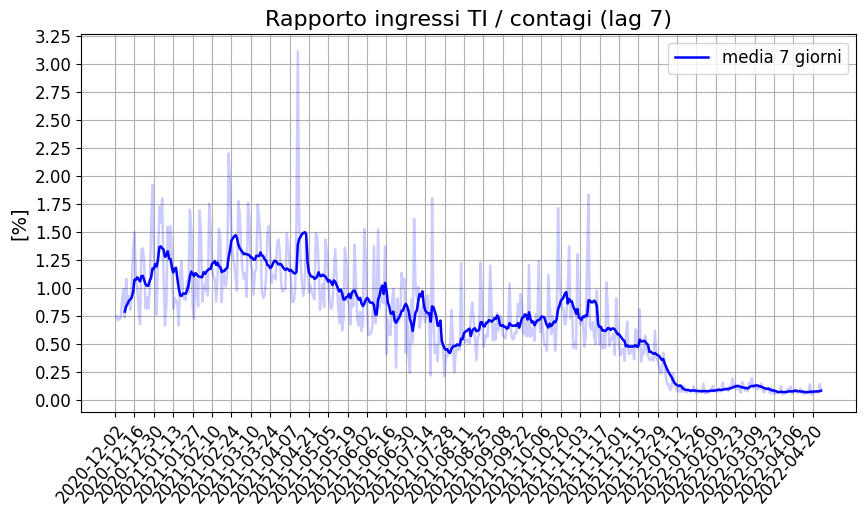

In [34]:
createXYPlot(df, x="giorno", 
             y=["ti_ratio",
                "ti_ratio_media_7"], 
             plots_folder=plots_folder,
             start_date="2020-12-01",
             days_interval=14,
             linewidth=1.8,
             colors=["b","b"],
             alphas=[0.2,1],
             figsize_x=10,
             figsize_y=5,
             labels=[None, "media 7 giorni"],
             title="Rapporto ingressi TI / contagi (lag 7)",
             savename="ti_ratio",
             yticks=np.arange(0,3.5,0.25),
             ytitle="[%]"
            )

In [36]:
df[["ingressi_terapia_intensiva_lag_7","variazione_deceduti"]]

ingressi_terapia_intensiva_lag_7  variazione_deceduti
0                                38.0                146.0
1                                39.0                 93.0
2                                33.0                 79.0
3                                39.0                143.0
4                                49.0                202.0
5                                35.0                166.0
6                                42.0                205.0
7                                53.0                127.0
8                                30.0                 79.0
9                                39.0                 85.0
10                               42.0                133.0
11                               52.0                133.0
12                               65.0                149.0
13                               51.0                155.0
14                               57.0                169.0
15                               36.0                115.0
16                               42.0                 90.0
17                               72.0                112.0
18                               47.0                144.0
19                               46.0                150.0
20                               50.0                149.0
21                               46.0                194.0
22                               39.0                125.0
23                               40.0                118.0
24                               45.0                129.0
25                               49.0                154.0
26                               41.0                159.0
27                               55.0                170.0
28                               47.0                177.0
29                               31.0                 95.0
30                               29.0                 82.0
31                               56.0                118.0
32                               47.0                146.0
33                               51.0                182.0
34                               31.0                153.0
35                               51.0                197.0
36                               32.0                119.0
37                               41.0                 93.0
38                               40.0                 85.0
39                               35.0                165.0
40                               48.0                128.0
41                               43.0                137.0
42                               50.0                180.0
43                               35.0                129.0
44                               37.0                 86.0
45                               59.0                133.0
46                               31.0                156.0
47                               52.0                136.0
48                               40.0                156.0
49                               74.0                184.0
50                               39.0                130.0
51                               26.0                105.0
52                               44.0                173.0
53                               58.0                210.0
54                               56.0                185.0
55                               81.0                214.0
56                               82.0                233.0
57                               55.0                207.0
58                               52.0                144.0
59                               76.0                210.0
60                               52.0                193.0
61                               71.0                249.0
62                               75.0                252.0
63                               87.0                322.0
64                               63.0                201.0
65                               66.0                141.0
66                               68.0               

In [37]:
df.sort_values(by="tasso_positivi_test_rapido",ascending=False)[["giorno","tasso_positivi_test_rapido"]].head(10)

giorno  tasso_positivi_test_rapido
58   2022-02-27                   23.338820
1    2022-04-25                   22.035534
8    2022-04-18                   20.790176
5    2022-04-21                   18.532655
2    2022-04-24                   17.945010
37   2022-03-20                   17.752444
0    2022-04-26                   17.623121
4    2022-04-22                   17.341357
100  2022-01-16                   17.098247
6    2022-04-20                   17.069386

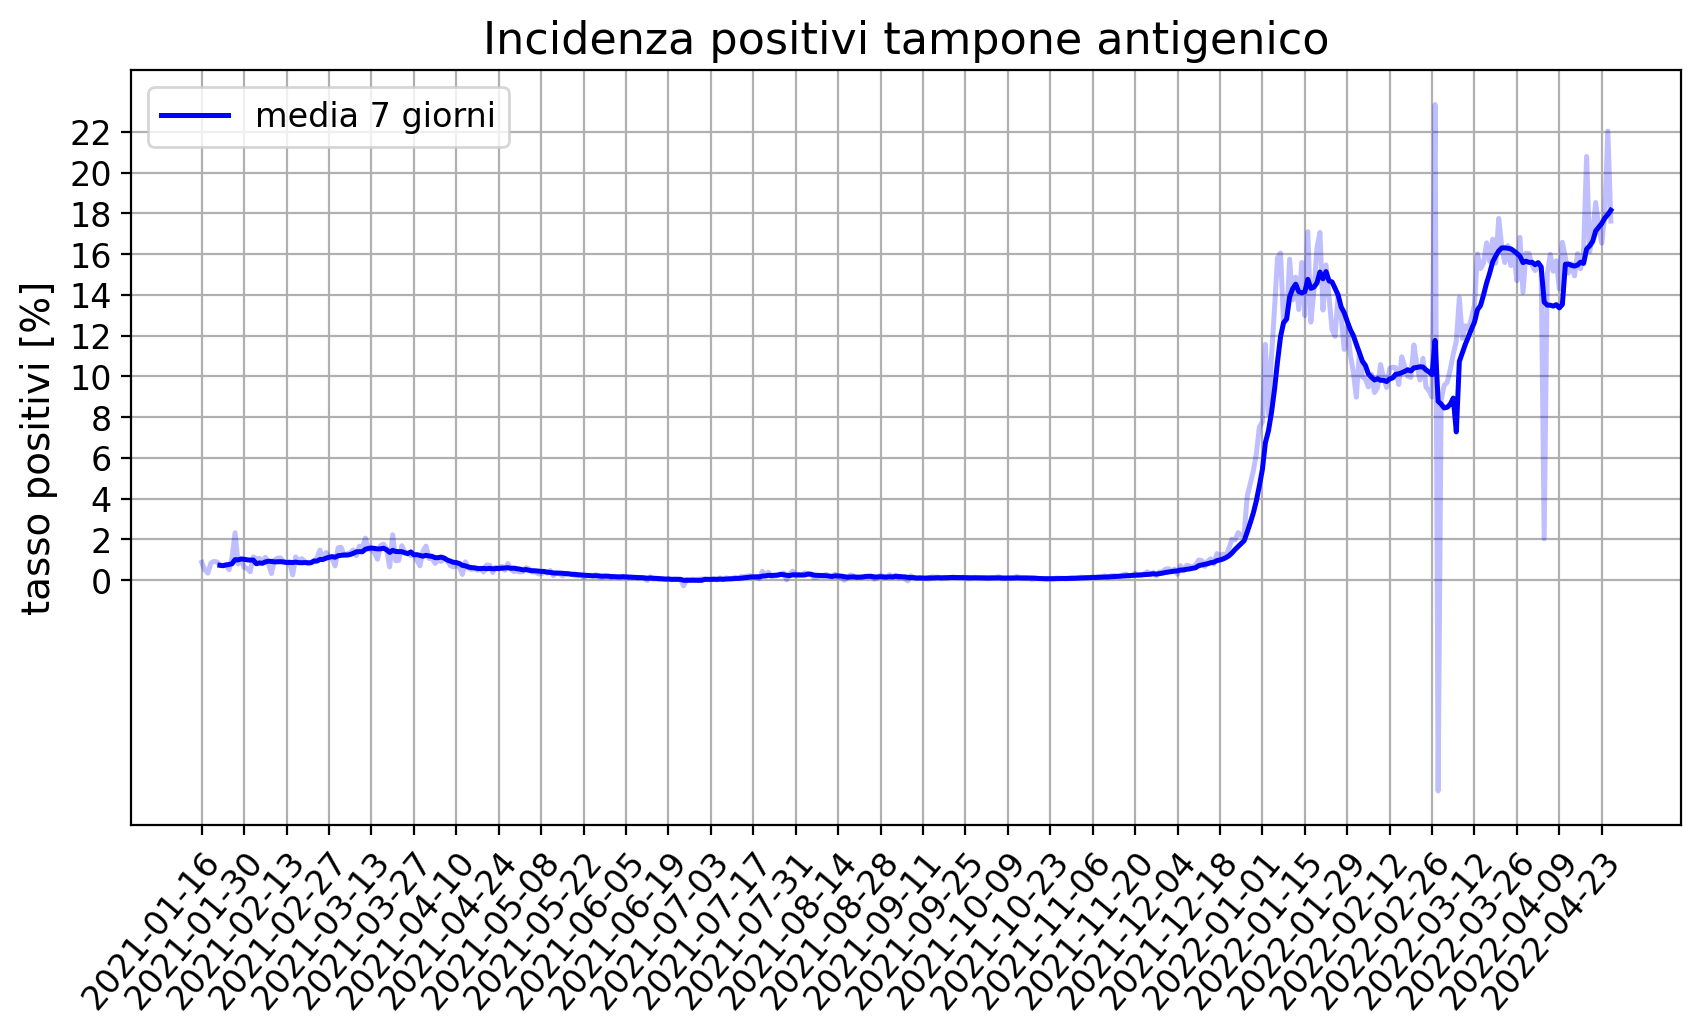

In [40]:
createXYPlot(df,
             days_interval = 14,
             x="giorno",
             linewidth=1.8,
             dpis=200,
             ytitle="tasso positivi [%]",
             y=[
                "tasso_positivi_test_rapido",
                "tasso_positivi_test_rapido_media_7", 
               ],
             labels=[None,"media 7 giorni"],
             alphas=[0.25,1],
             colors=["b","b"],
             plots_folder=plots_folder,
             title="Incidenza positivi tampone antigenico",
             start_date="2021-01-15",
             figsize_x=10,
             figsize_y=5,
             yticks=np.arange(0.00, 24.0, 2.0),
             savename="tasso_positivi_tampone_rapido.png")

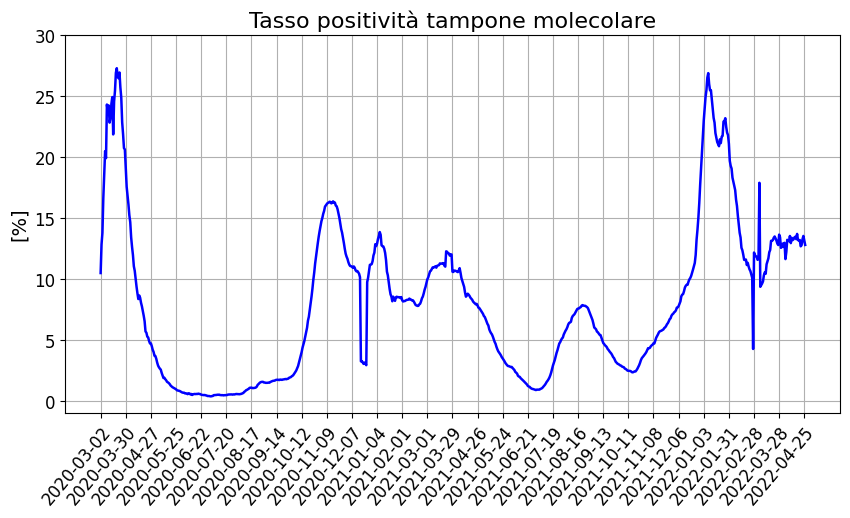

In [41]:
createXYPlot(df,y=["tasso_positivi_test_molecolare_media_7"],
             x="giorno",
             days_interval=28,
             start_date="2020-01-01",
             plots_folder=plots_folder,
             remove_negative=True,
             colors=["b"],
             linewidth=1.8,
             yticks=np.arange(0,35,5),
             title="Tasso positività tampone molecolare",
             ytitle="[%]",
             figsize_x=10,
             figsize_y=5,
             savename="tasso_positivi_tampone_molecolare.png",
            )

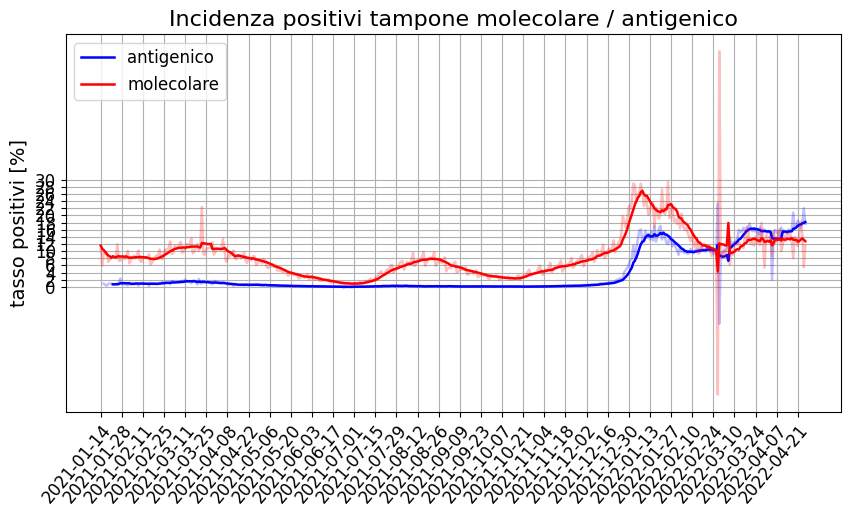

In [42]:
createXYPlot(df,
             days_interval = 14,
             x="giorno",
             linewidth=1.8,
             dpis=100,
             ytitle="tasso positivi [%]",
             y=[
                "tasso_positivi_test_rapido",
                "tasso_positivi_test_rapido_media_7",
                "tasso_positivi_test_molecolare",
                "tasso_positivi_test_molecolare_media_7",
               ],
             colors=["b","b","r","r"],
             alphas=[0.25,1,0.25,1],
             labels=[None,"antigenico",None,"molecolare"],
             plots_folder=plots_folder,
             title="Incidenza positivi tampone molecolare / antigenico",
             start_date="2021-01-13",
             figsize_x=10,
             figsize_y=5,
             yticks=np.arange(0,32,2),
             savename="tasso_positivi.png")

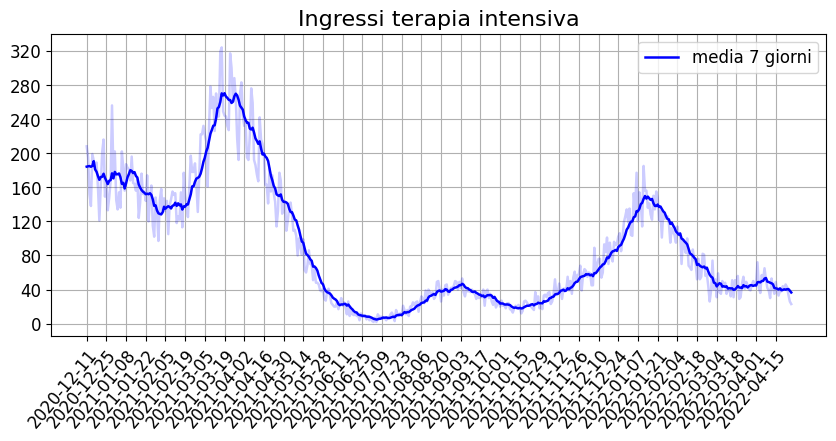

In [43]:
createXYPlot(df,
             days_interval = 14,
             x="giorno",
             linewidth=1.8,
             dpis=100,
             y=["ingressi_terapia_intensiva",
                "ingressi_terapia_intensiva_media_7"
               ],
             labels=[None,"media 7 giorni"],
             alphas=[0.2,1],
             colors=["b","b"],
             plots_folder=plots_folder,
             start_date="2020-12-10",
             yticks=np.arange(0,340,40),
             figsize_x=10,
             figsize_y=4,
             title="Ingressi terapia intensiva",
             savename="ingressi_ti")

In [44]:
df[df.giorno==datetime.strptime("2022-01-30","%Y-%m-%d").date()][["data","giorno","dimessi_guariti"]]

data      giorno  dimessi_guariti
86 2022-01-30 17:00:00  2022-01-30          8135519

In [45]:
df[df.giorno==datetime.strptime("2021-08-05","%Y-%m-%d").date()][["data","giorno","dimessi_guariti"]]

data      giorno  dimessi_guariti
264 2021-08-05 17:00:00  2021-08-05          4147979

In [46]:
def stakHist(df, var_names, startDate):
    
    fig, ax = plt.subplots(dpi=200,figsize=(20,8))
    dfplot = df[df.giorno >= datetime.strptime(startDate,"%Y-%m-%d").date()]
    dfplot = dfplot.sort_values(by="giorno",ascending=True).reset_index()
    
    indexes = np.arange(0,len(dfplot.index),4)
    labels = [ str(dfplot["giorno"].tolist()[i]) for i in indexes]
    
    
    for name in var_names.keys():
        y = dfplot[name]
        if name == "variazione_deceduti": y = -y
        plt.bar(dfplot.index+var_names[name][0], y, color=var_names[name][1],label=name, alpha=0.6,width=0.3,align="center")
    plt.xticks(indexes,
               labels,
               fontsize=14,
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right"
              )
    plt.yticks(fontsize=16)
    plt.grid()
    plt.legend(fontsize=16)
    plt.title("Variazione Terapia intensiva",fontsize=20)
    plt.savefig(f"./plots/{oggi}/ti_morti_ingressi.png",bbox_inches="tight")
        

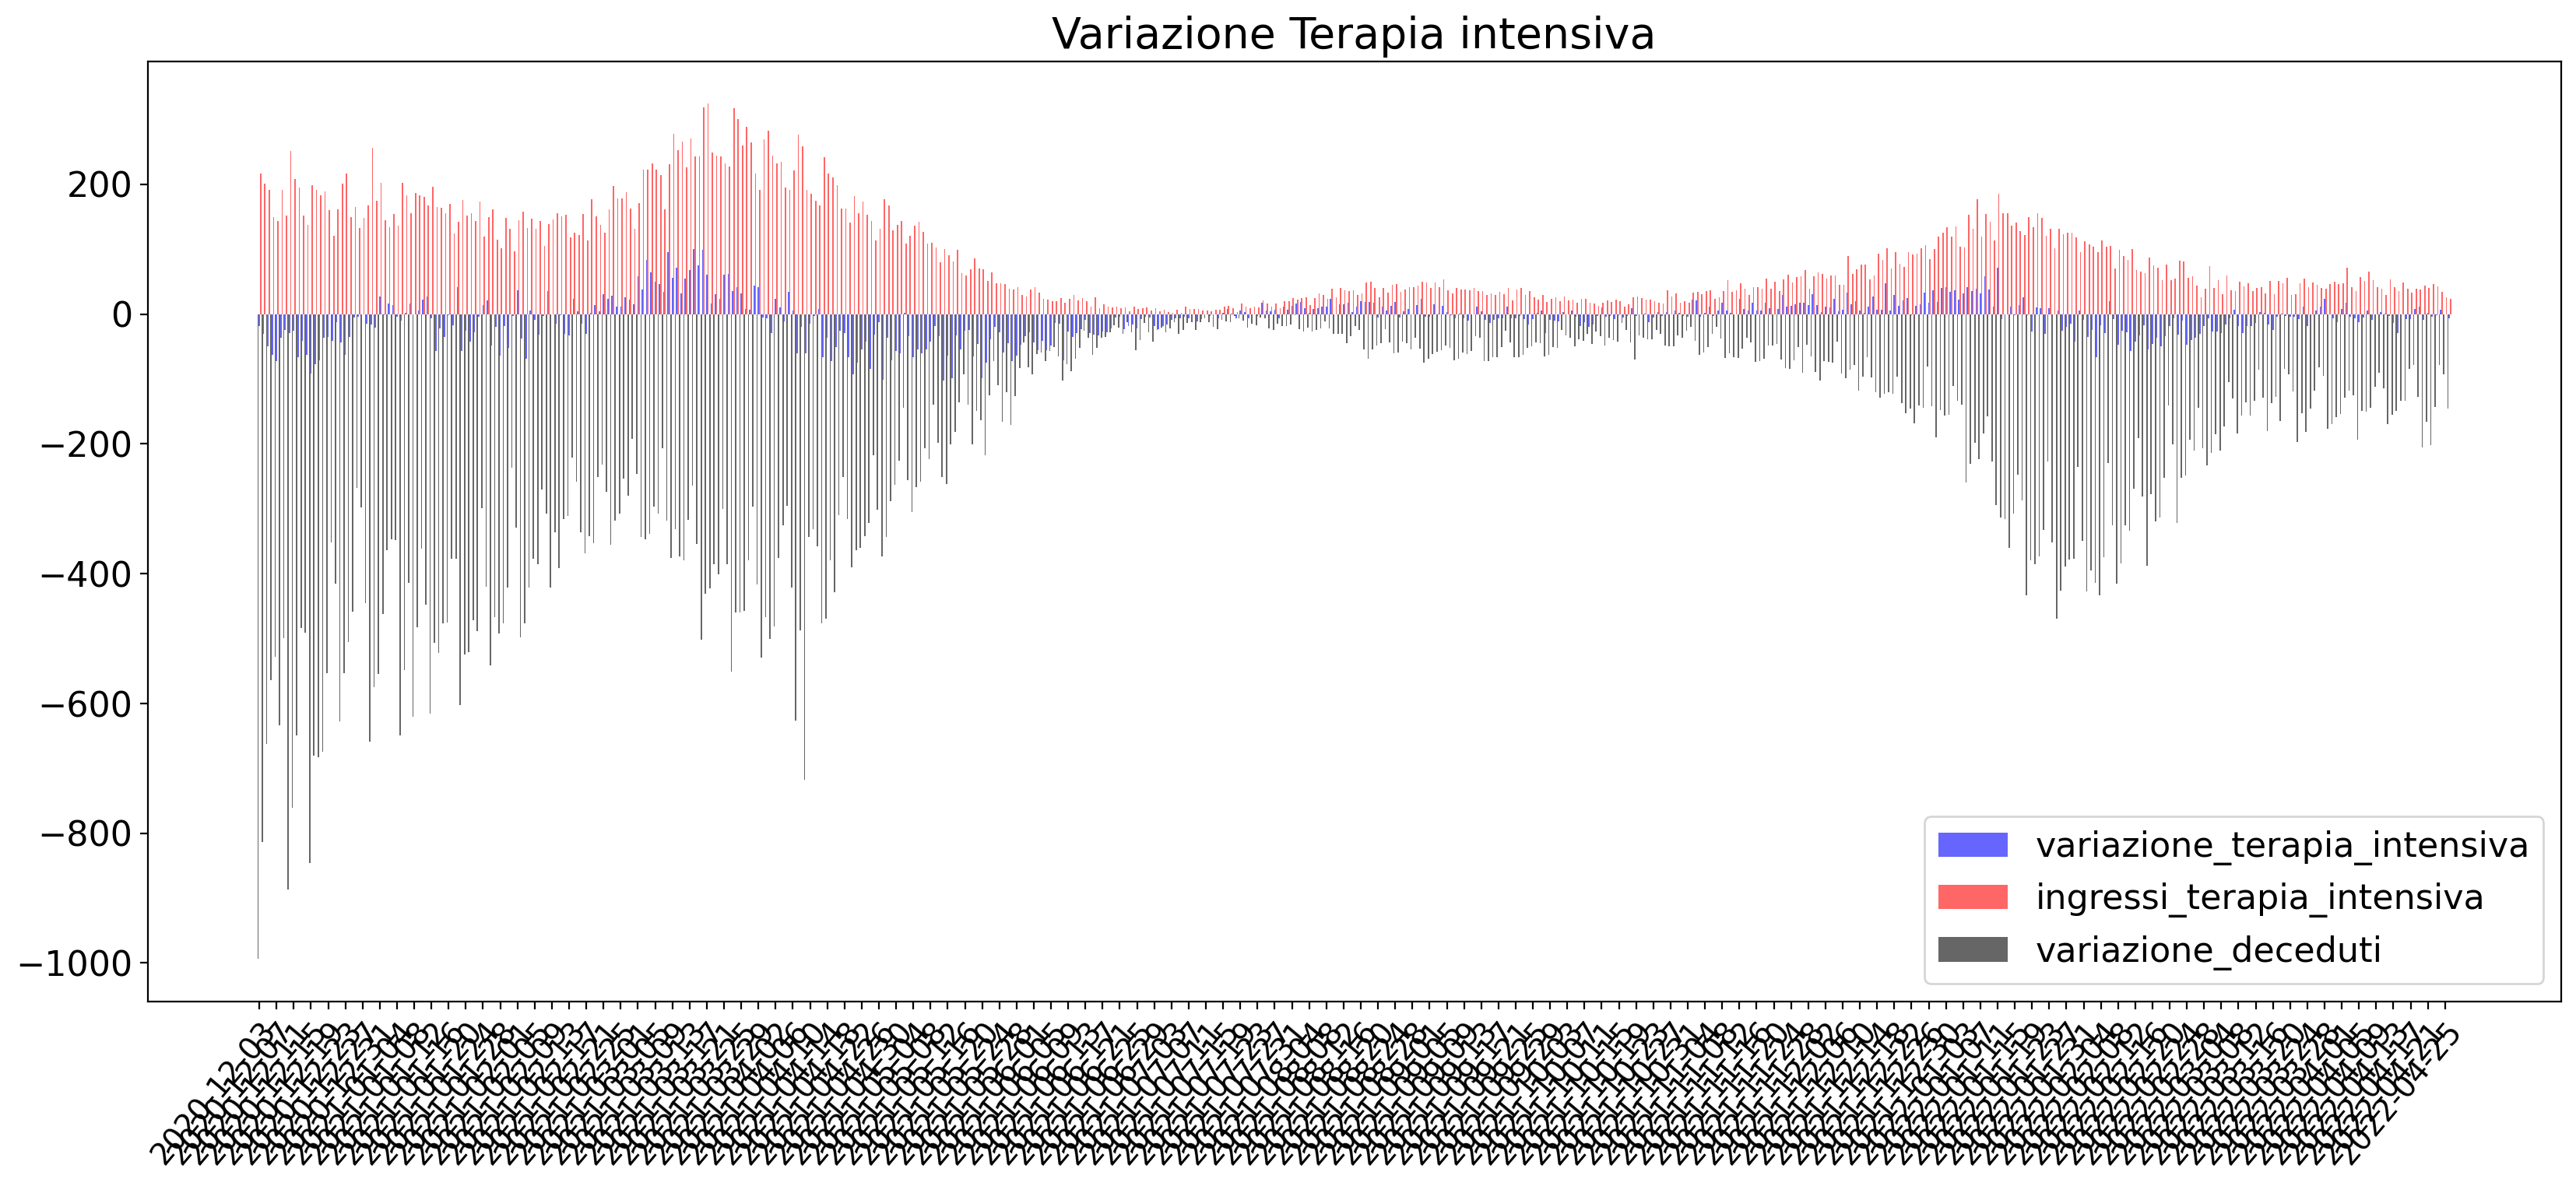

In [47]:
stakHist(df,
         {"variazione_terapia_intensiva":[0,"blue"],
          "ingressi_terapia_intensiva":[0.3,"red"],
          "variazione_deceduti":[-0.3,"black"]},
         "2020-12-03")

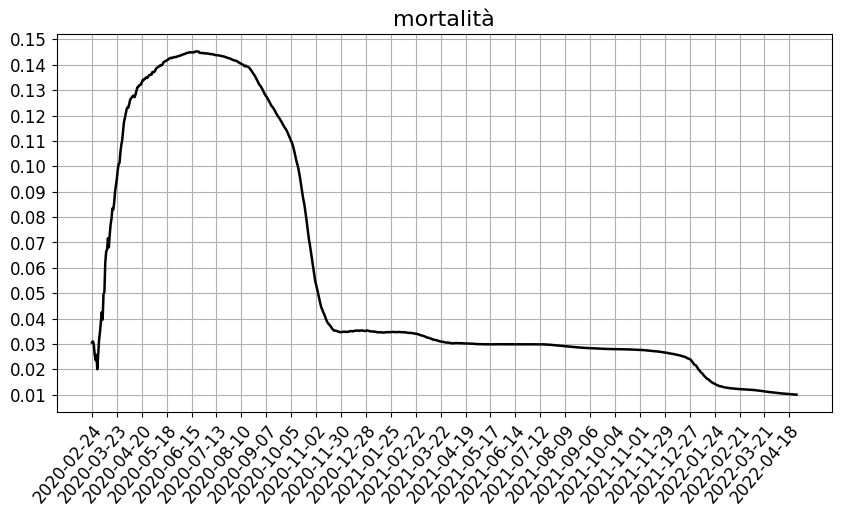

In [48]:
createXYPlot(df,
             y=["mortalità"],
             x="giorno",
             colors=["black"],
             days_interval=28,
             linewidth=1.8,
             dpis=100,
             plots_folder=plots_folder,
             yticks=np.arange(0.01,0.16,0.01),
             title="mortalità")

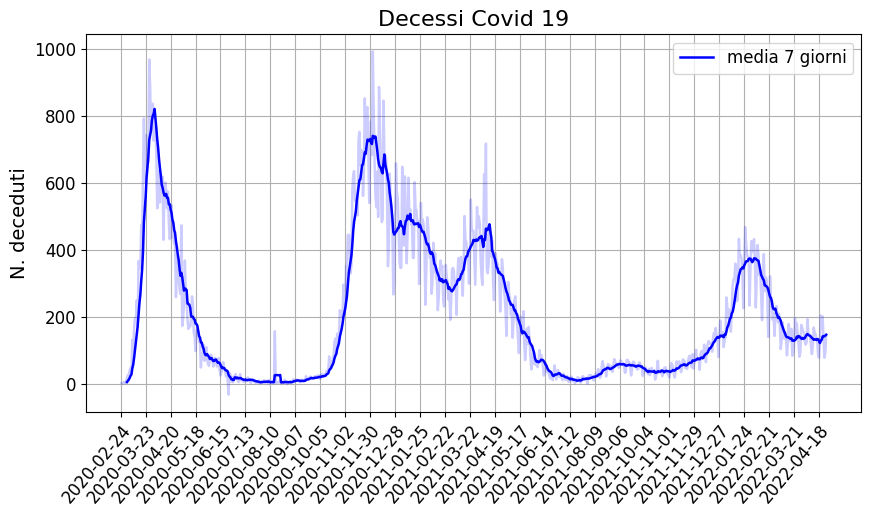

In [49]:
createXYPlot(df,
             y=["variazione_deceduti","variazione_deceduti_media_7"],
             labels=[None,"media 7 giorni"],
             x="giorno",
             ytitle="N. deceduti",
             colors=["b","b"],
             alphas=[0.2,1],
             days_interval = 28,
             dpis=100,
             plots_folder=plots_folder,
             linewidth=1.8,
             figsize_x=10,
             figsize_y=5,
             start_date="2020-01-29",
             title="Decessi Covid 19",
             savename="deceduti"
            )

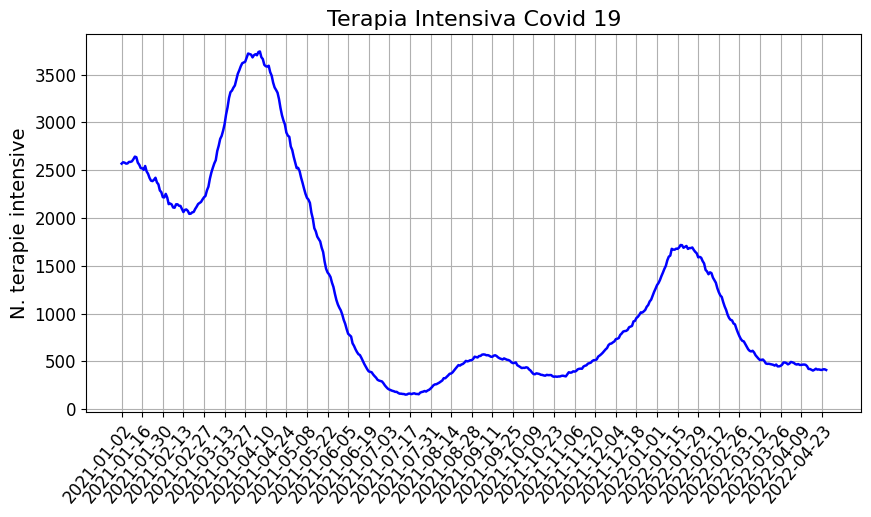

In [50]:
createXYPlot(df,
             y=["terapia_intensiva"],
             labels=["terapia intensiva"],
             x="giorno",
             ytitle="N. terapie intensive",
             colors=["b"],
             alphas=[1],
             days_interval=14,
             dpis=100,
             plots_folder=plots_folder,
             linewidth=1.8,
             figsize_x=10,
             figsize_y=5,
             start_date="2021-01-01",
             title="Terapia Intensiva Covid 19",
             savename="terapia_intensiva"
            )

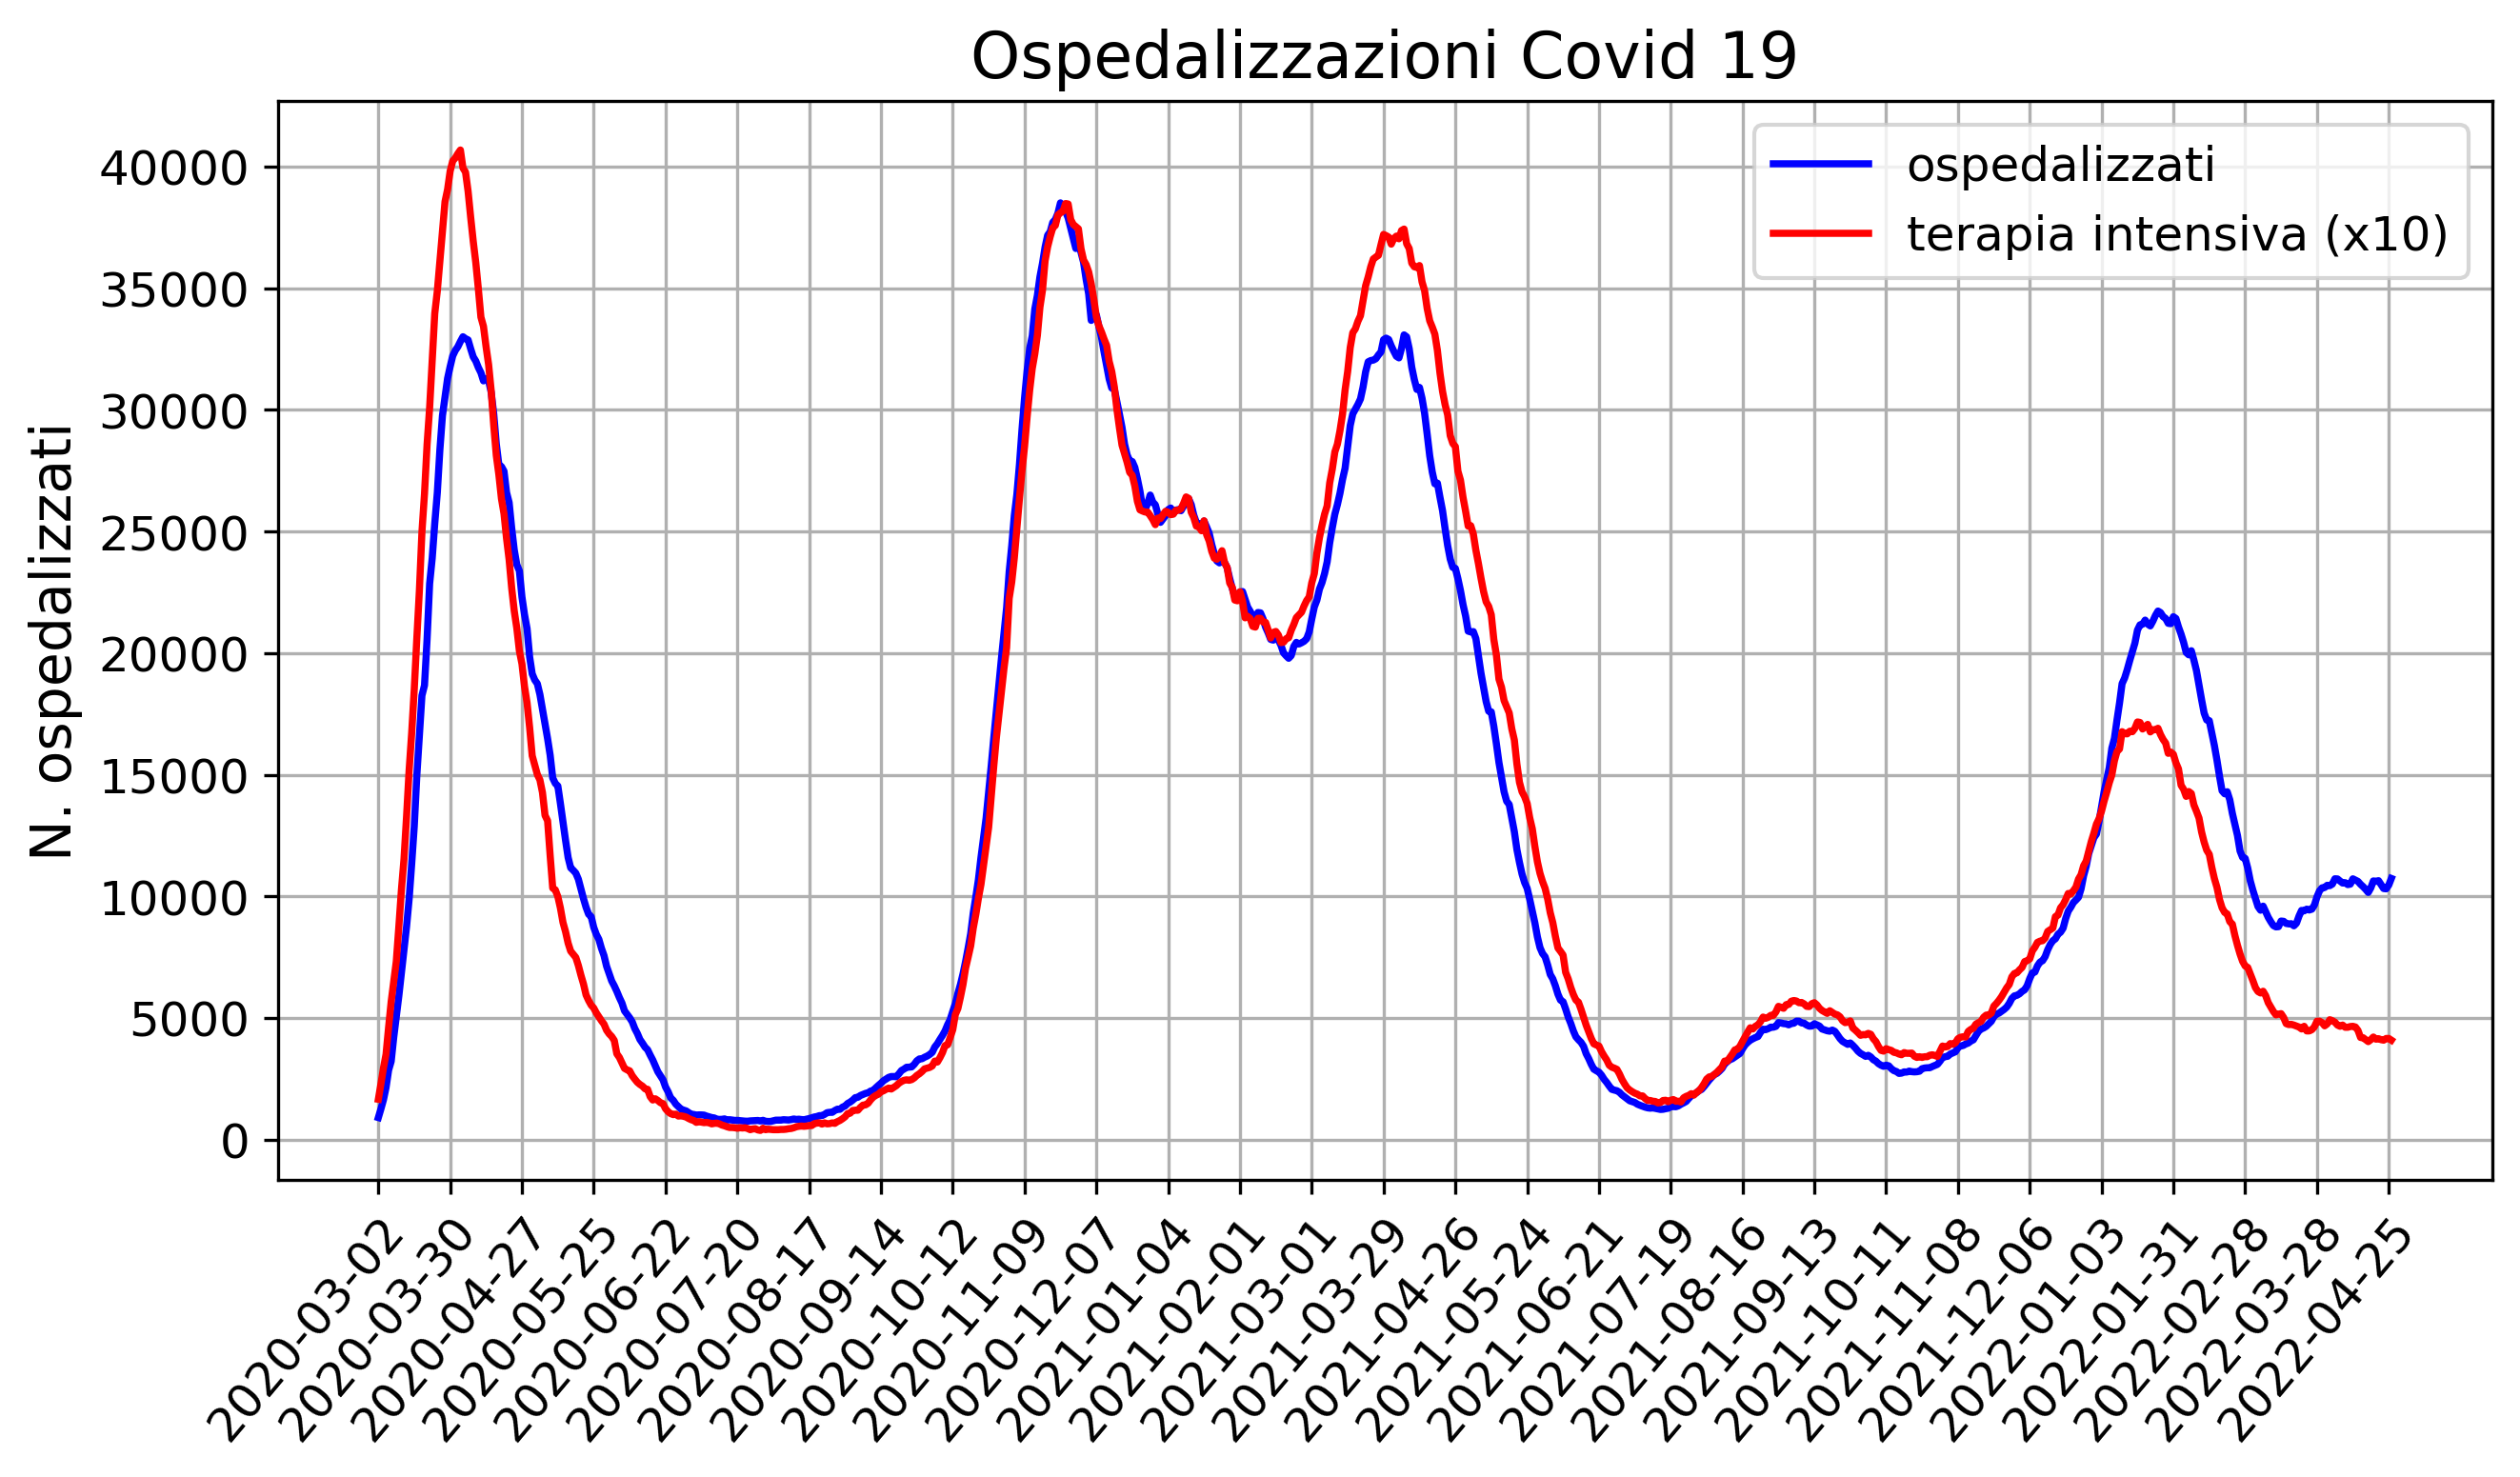

In [51]:
df["terapia_intensiva_x10"] = 10*df["terapia_intensiva"]
createXYPlot(df,
             y=["totale_ospedalizzati", "terapia_intensiva_x10"],
             labels=["ospedalizzati", "terapia intensiva (x10)"],
             x="giorno",
             ytitle="N. ospedalizzati",
             colors=["b","r"],
             alphas=[1,1],
             days_interval = 28,
             dpis=300,
             plots_folder=plots_folder,
             linewidth=1.8,
             figsize_x=10,
             figsize_y=5,
             start_date="2020-03-01",
             title="Ospedalizzazioni Covid 19",
             savename="ospedalizzazioni_ti",
             yscale="linear"
            )

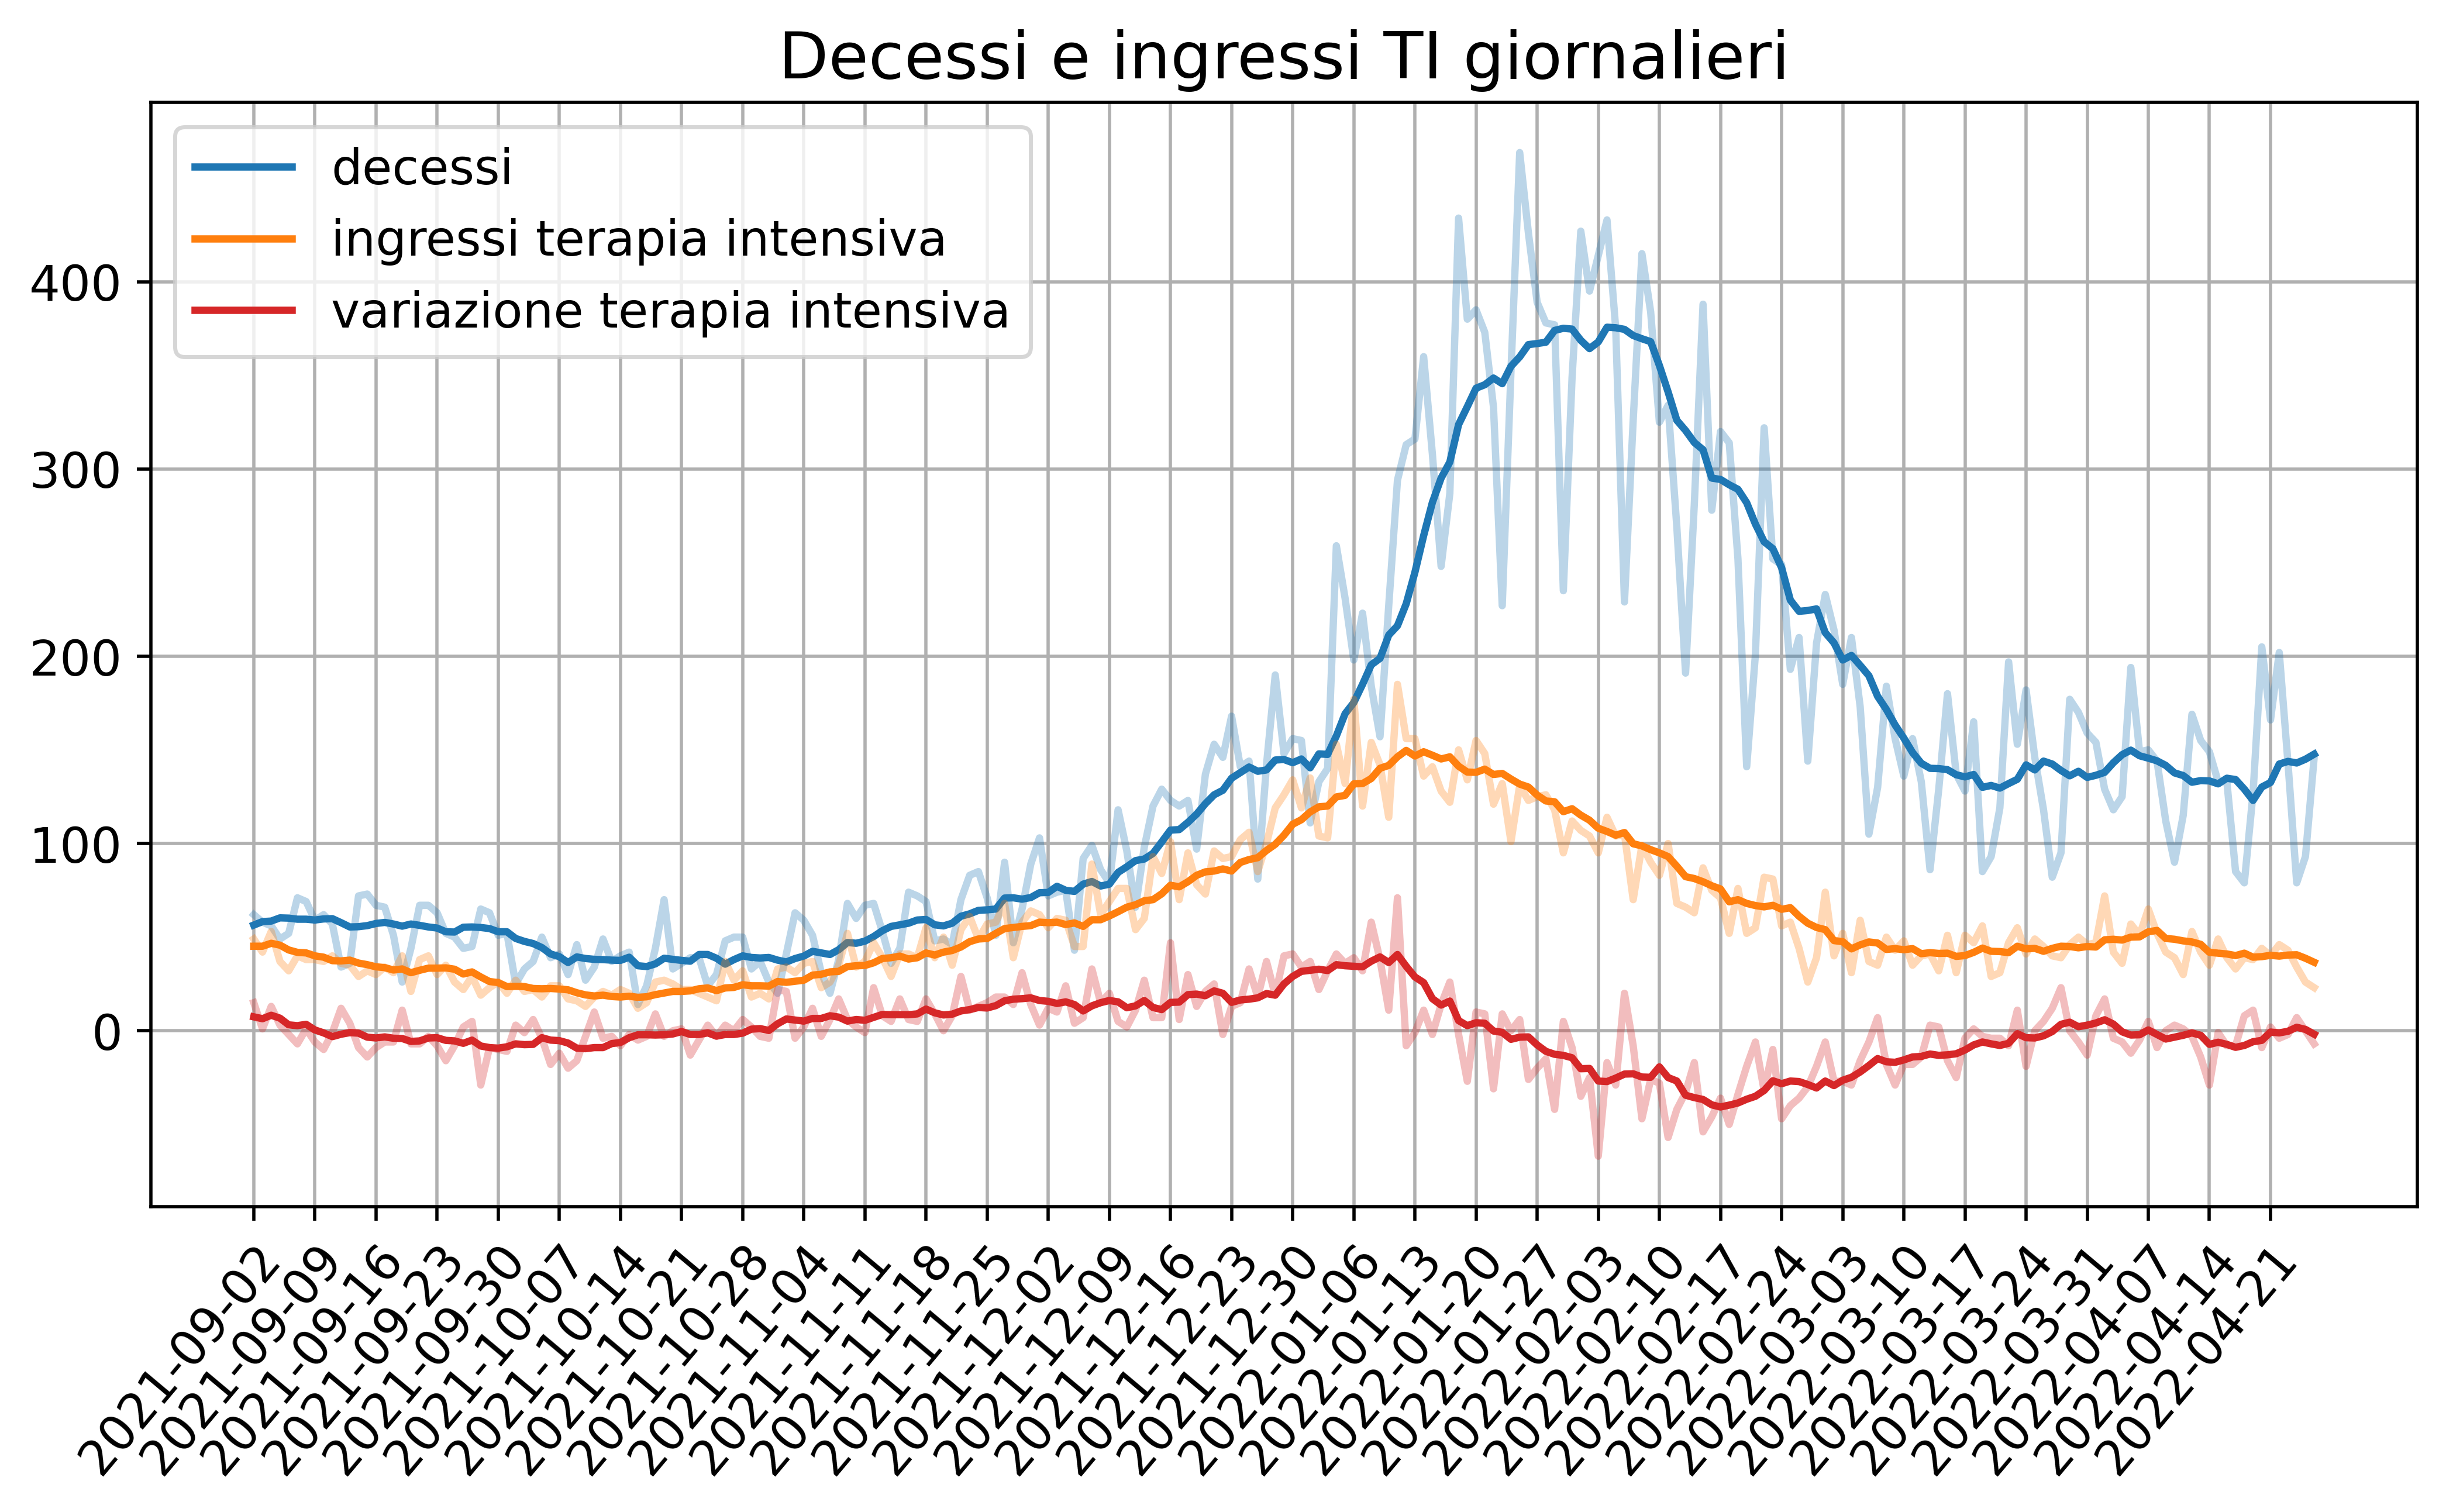

In [52]:
createXYPlot(df,
             y=["variazione_deceduti",
                "variazione_deceduti_media_7",
                "ingressi_terapia_intensiva",
                "ingressi_terapia_intensiva_media_7",
                "variazione_terapia_intensiva",
                "variazione_terapia_intensiva_media_7",
               ],
             x="giorno",
             ytitle="",
             alphas=[0.3,1,0.3,1,0.3,1],
             colors=[colors[0],colors[0],colors[1],colors[1],colors[3],colors[3]],
             labels=[
                 None,"decessi",
                 None,"ingressi terapia intensiva",
                 None,"variazione terapia intensiva"
             ],
             days_interval = 7,
             dpis=500,
             plots_folder=plots_folder,
             linewidth=1.8,
             figsize_x=10,
             figsize_y=5,
             start_date="2021-09-01",
             title="Decessi e ingressi TI giornalieri",
             savename="deceduti_ingressi_ti.png")

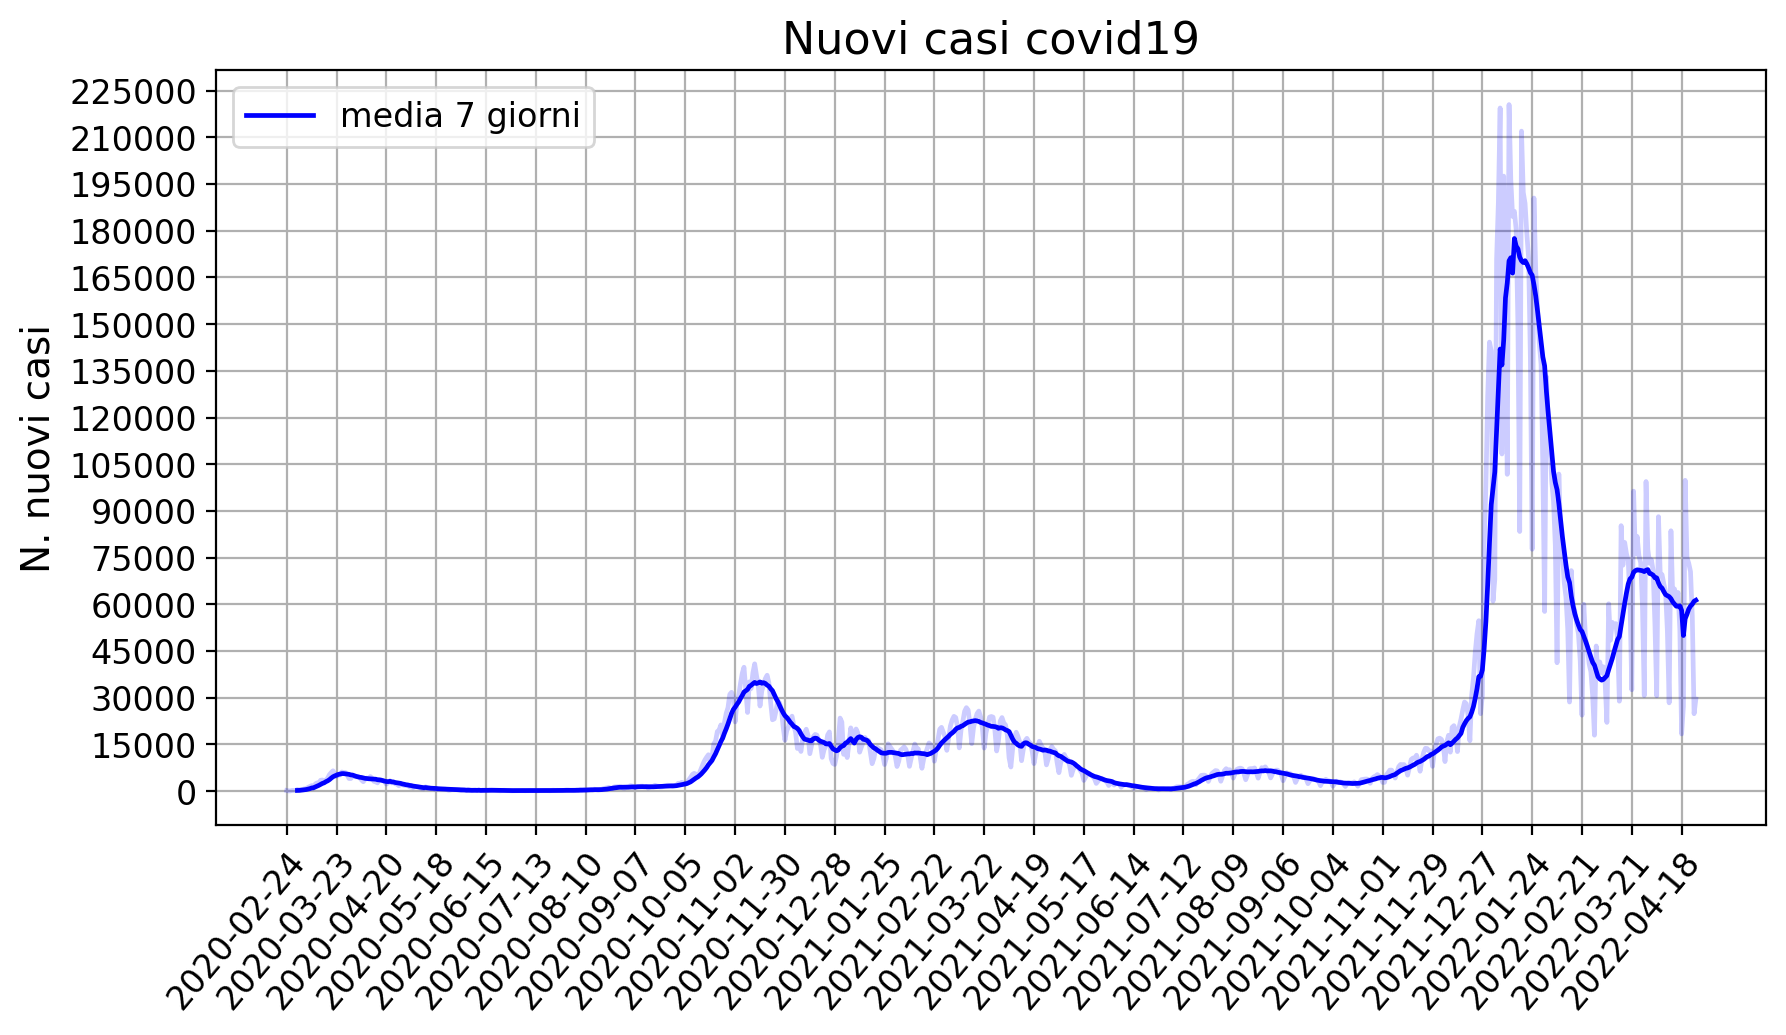

In [53]:
createXYPlot(df,
             y=["nuovi_positivi","nuovi_positivi_media_7"],
             labels=[None,"media 7 giorni"],
             x="giorno",
             ytitle="N. nuovi casi",
             alphas=[0.2,1],
             colors=["b","b"],
             days_interval = 28,
             dpis=200,
             plots_folder=plots_folder,
             linewidth=1.7,
             yticks=np.arange(0,230000,15000),
             start_date="2020-01-01",
             title="Nuovi casi covid19",
             savename="nuovi_positivi.png",
            )

In [54]:
z_value = 1.645
df1 = (df[["data","deceduti","totale_casi","giorno", "totale_ospedalizzati"]]
       .groupby(df["data"].dt.strftime("%m-%y"))
       .head(1).reset_index().drop(columns=["index"]))


df1["deceduti_mese"] = df1["deceduti"] - df1["deceduti"].shift(-1) 
df1["deceduti_mese"] = df1.deceduti_mese.combine_first(df1.deceduti)  

df1["casi_mese"] = df1["totale_casi"] - df1["totale_casi"].shift(-1) 
df1["casi_mese"] = df1.casi_mese.combine_first(df1.totale_casi)                                     

df1["letalità_mese"]=np.round(100*df1["deceduti_mese"]/df1["casi_mese"],2)
df1["tasso_ospedalizzazione_mese"]=np.round(100*df1["totale_ospedalizzati"]/df1["casi_mese"],2)

df1=df1.sort_values(by=["data"])
df1["data_plot"] = df1["data"].dt.strftime("%B-%Y")

df1["sd_letalità_mese"] = z_value*np.round(100*np.sqrt(df1["letalità_mese"])/np.sqrt(df1["casi_mese"]),2)
df1["sd_tasso_ospedalizzazione_mese"] = z_value*np.round(100*np.sqrt(df1["tasso_ospedalizzazione_mese"])/np.sqrt(df1["casi_mese"]),2)

df1["letalità_up_err"] = df1["sd_letalità_mese"]
df1["letalità_lo_err"] = np.where(df1['sd_letalità_mese'] > df1['letalità_mese'],df1['letalità_mese'], df1['sd_letalità_mese'])

df1["tasso_ospedalizzazione_up_err"] = df1["sd_tasso_ospedalizzazione_mese"]
df1["tasso_ospedalizzazione_lo_err"] = np.where(df1['sd_tasso_ospedalizzazione_mese'] > df1['tasso_ospedalizzazione_mese'],df1['tasso_ospedalizzazione_mese'], df1['sd_tasso_ospedalizzazione_mese'])

df1["year"] = df1["data"].dt.strftime("%Y")
df1["month"] = df1["data"].dt.strftime("%B")
df1["month_num"] = df1["data"].dt.strftime("%m").astype(int)



df1_2020 = df1[df1.year=='2020'].set_index("month_num")
df1_2021 = df1[df1.year=='2021'].set_index("month_num")
df1_2020_2021 = df1_2020.join(df1_2021,lsuffix="_2020",rsuffix="_2021",how="outer").reset_index()

import calendar
month_dict={i:list(calendar.month_name)[i] for i in range(1,13)}
print(month_dict)

df1_2020_2021["month"]=df1_2020_2021["month_num"].replace(month_dict)

{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}


In [36]:
def get_montly_plot(x):
    asymmetric_error = [df1[f"{x}_lo_err"],df1[f"{x}_up_err"]]

    max_val = int(np.max(df1[f"{x}_mese"])) + int(np.max(df1[f"{x}_up_err"]))
    fig,ax=plt.subplots(dpi=200,figsize=(11,5))
    plt.bar(df1["data_plot"],df1[f"{x}_mese"],alpha=0.8)
    plt.errorbar(x=df1["data_plot"],y=df1[f"{x}_mese"],
             yerr=asymmetric_error,
             fmt='o',color="black",lolims=0,
            linewidth=0.8,capsize=3,markersize=3)
    for i, v in enumerate(df1[f"{x}_mese"]):
        ax.text(i+0.1, v+0.2, f"{np.round(v,2)}%", horizontalalignment="left",rotation=40)
    _=plt.yticks(np.arange(0,max_val,5),fontsize=12)
    plt.ylabel(f"{x} [%]".replace("_"," "),fontsize=15)
    _=plt.xticks(rotation=60, fontsize=12,
             rotation_mode="anchor", 
           verticalalignment = "top",
           horizontalalignment = "right")
    pltpath=f"./plots/{oggi}/{x}_mese.png"
    plt.title(f"{x} COVID-19 per mese".replace("_"," "),fontsize=16)
    plt.savefig(pltpath,bbox_inches="tight")

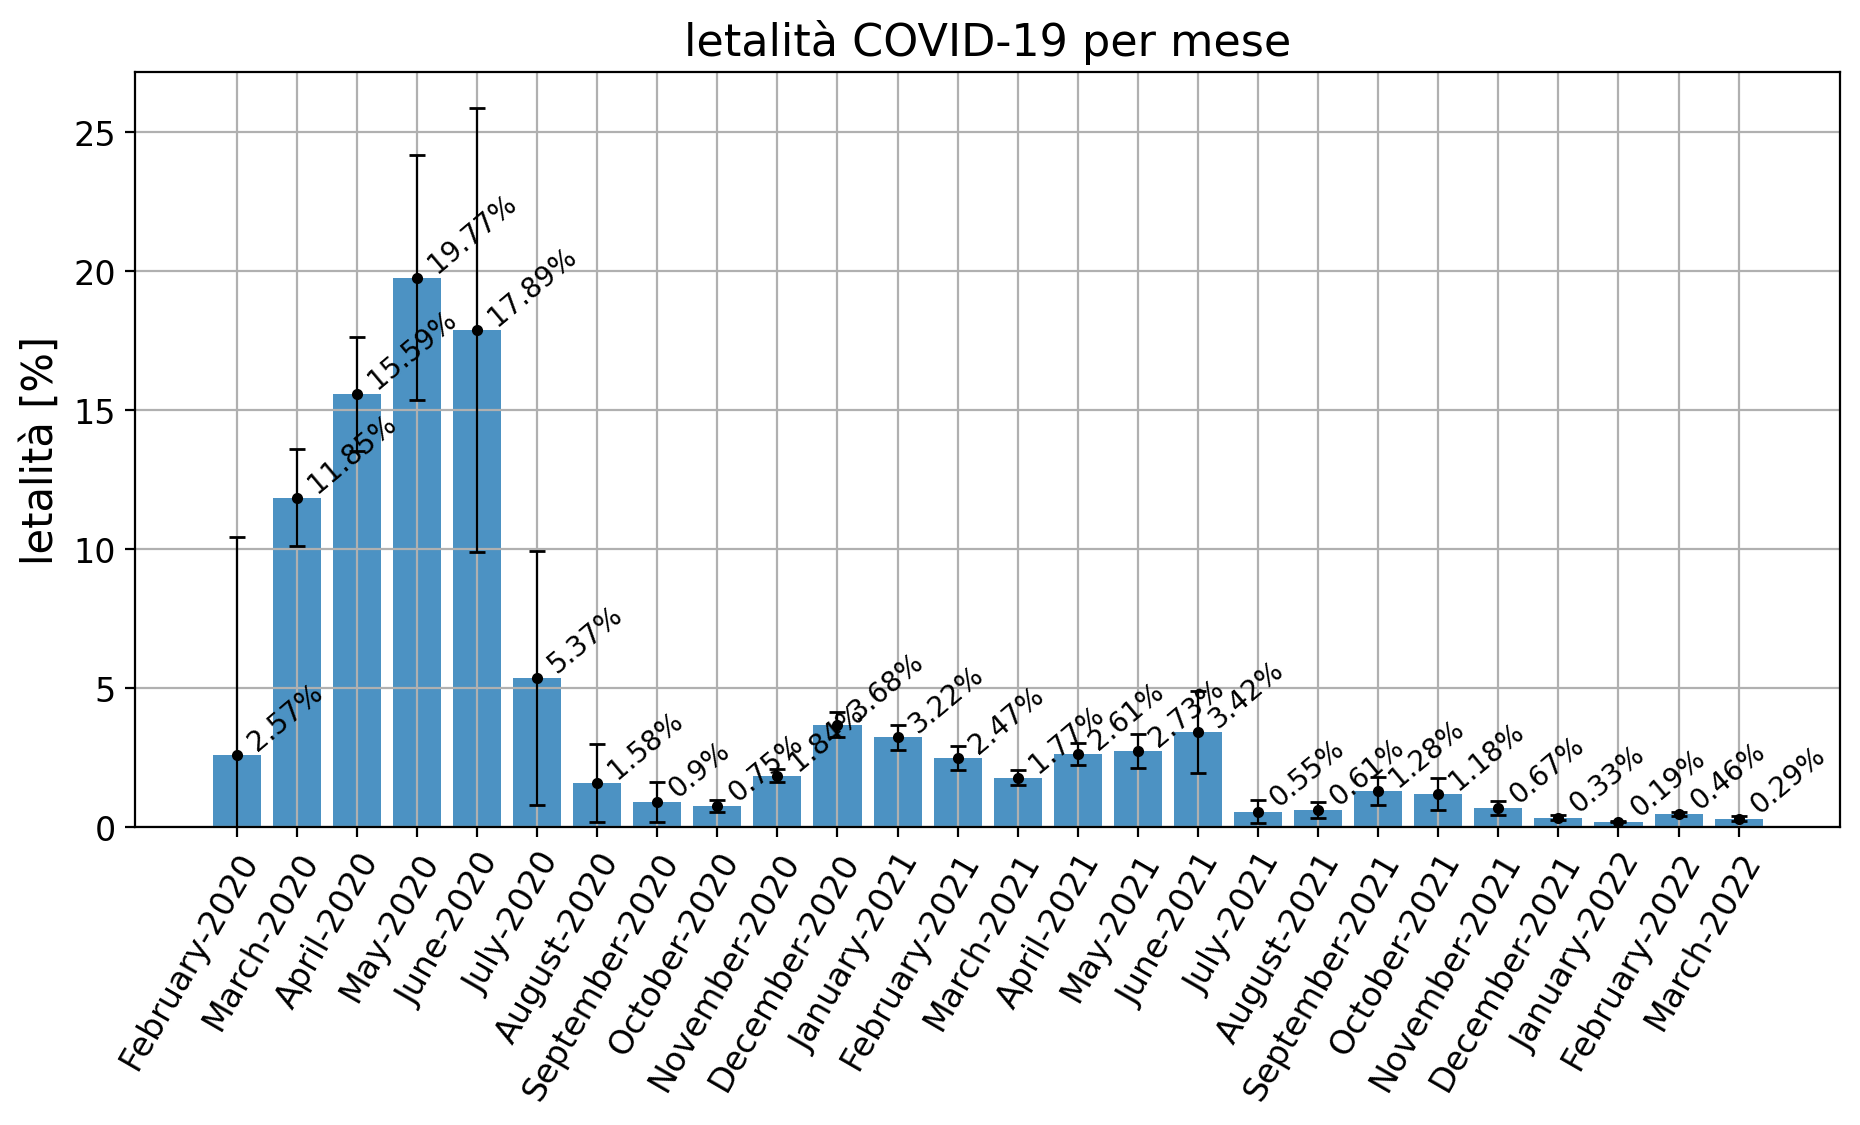

In [37]:
get_montly_plot(x="letalità")

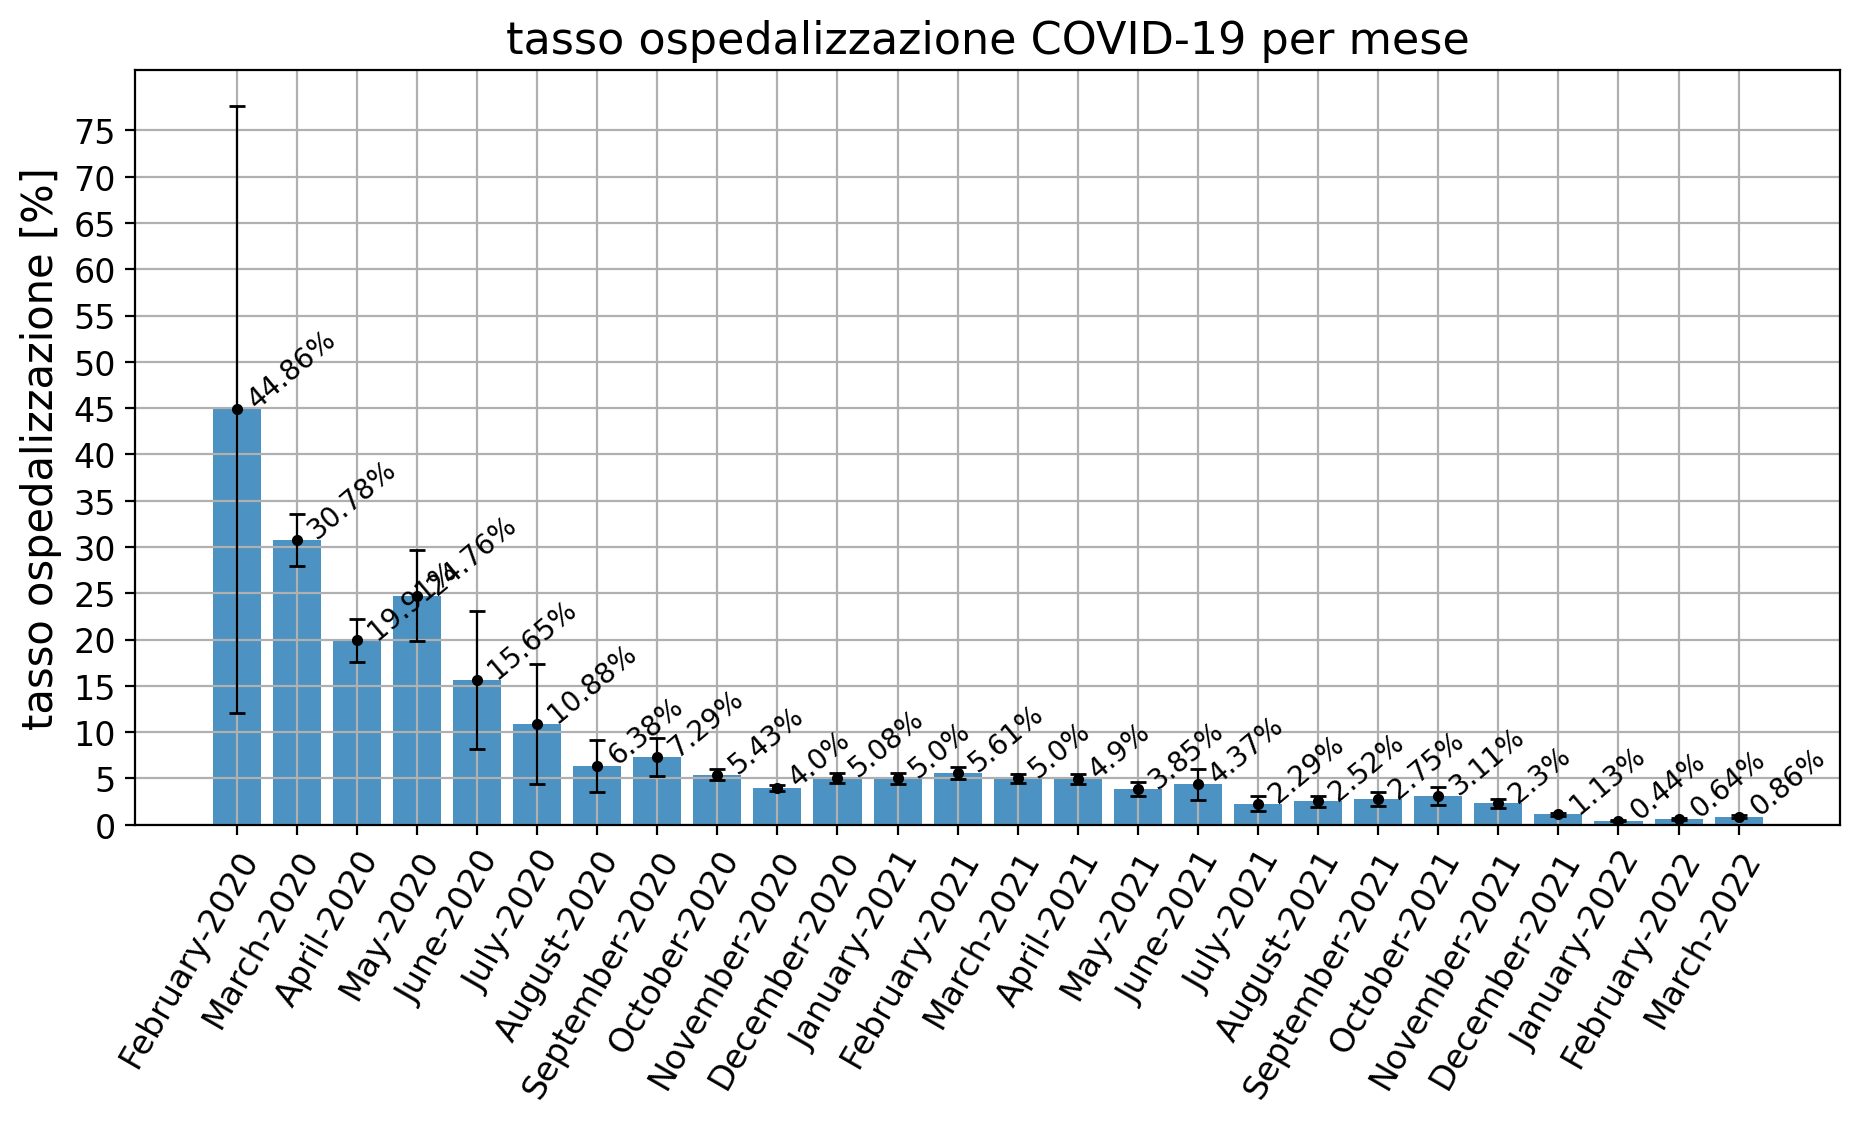

In [38]:
get_montly_plot(x="tasso_ospedalizzazione")

In [31]:
def get_range(n):
    if n % 2 == 0:
        r_plus = list(np.arange(n/2+1))
        r_plus.remove(0)
        r_minus = sorted([-x for x in r_plus])
        return r_minus + r_plus
    else: 
        r_plus = list(np.arange(n/2+1))
        r_minus = sorted([-x for x in r_plus])
        return sorted(list(set(r_minus + r_plus)))

In [32]:
def make_hist_comp(x):
    fig, ax = plt.subplots(figsize=(12,5),dpi=100)
    width=0.4
    
    years = [x.split("_")[1] for x in df1_2020_2021.columns if "year" in x]
    steps = get_range(len(years))
    for i in range(0,len(years)):
        asymmetric_error = [df1_2020_2021[f"{x}_lo_err_{years[i]}"],df1_2020_2021[f"{x}_up_err_{years[i]}"]]
        plt.bar(df1_2020_2021.month_num + steps[i]*(width/2), 
                df1_2020_2021[f"{x}_mese_{years[i]}"],
                alpha=0.8,align="center",width=width, label=years[i])
        plt.errorbar(x=df1_2020_2021.month_num + steps[i]*(width/2),
                     y=df1_2020_2021[f"{x}_mese_{years[i]}"],
                     yerr=asymmetric_error,
                     fmt='o',color="black",lolims=0,
                     linewidth=0.8,capsize=3,markersize=3)
    plt.legend(fontsize=13)
    _ = plt.xticks(list(np.arange(1,13,1)),
                   rotation=60, fontsize=13,
                   rotation_mode="anchor", 
                   verticalalignment = "top",
                   horizontalalignment = "right")
    _ = ax.set_xticklabels(df1_2020_2021.month.values)
    _ = plt.yticks(fontsize=13)
    plt.title(x.replace("_"," "),fontsize=18)
    plt.ylabel("[%]",fontsize=14)
    plt.grid()
    pltpath=f"./plots/{oggi}/year_comp_{x}.png"
    plt.savefig(pltpath,bbox_inches="tight")

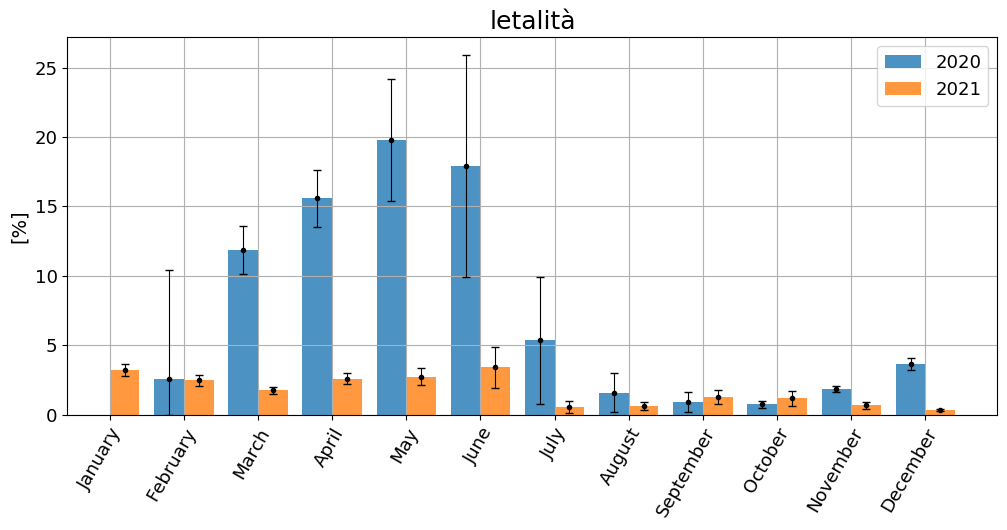

In [33]:
make_hist_comp("letalità")

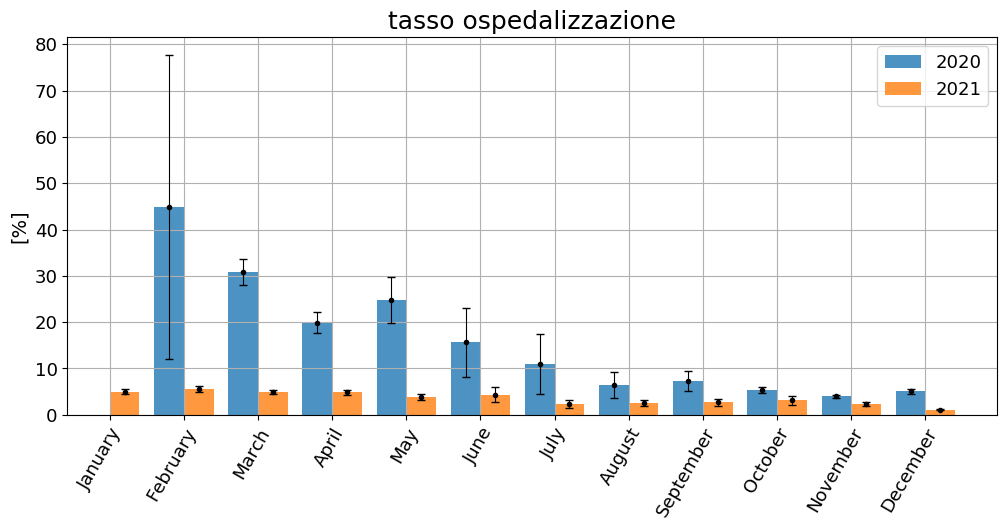

In [34]:
make_hist_comp("tasso_ospedalizzazione")

### Confronto anni

In [55]:
df["anno"] = pd.DatetimeIndex(df['data']).year
df["giorno"] = df['data'].dt.dayofyear
df["settimana"] = df['data'].dt.weekofyear

df_anno = df[["data",
              "anno",
              "settimana",
              "giorno",
              "variazione_deceduti",
              "terapia_intensiva",
              "variazione_deceduti_media_7",
              "totale_ospedalizzati",
              "variazione_tamponi",
              "variazione_tamponi_media_7",
              "nuovi_positivi",    
              "nuovi_positivi_media_7",
              "totale_positivi",
              "tasso_positivi",
              "tasso_positivi_media_7"
             ]]

In [56]:
df_dict = {}
years = [2020,2021,2022]
for year in years:
    df_dict[year] = df_anno[df_anno.anno == year].sort_values(by="giorno").reset_index()

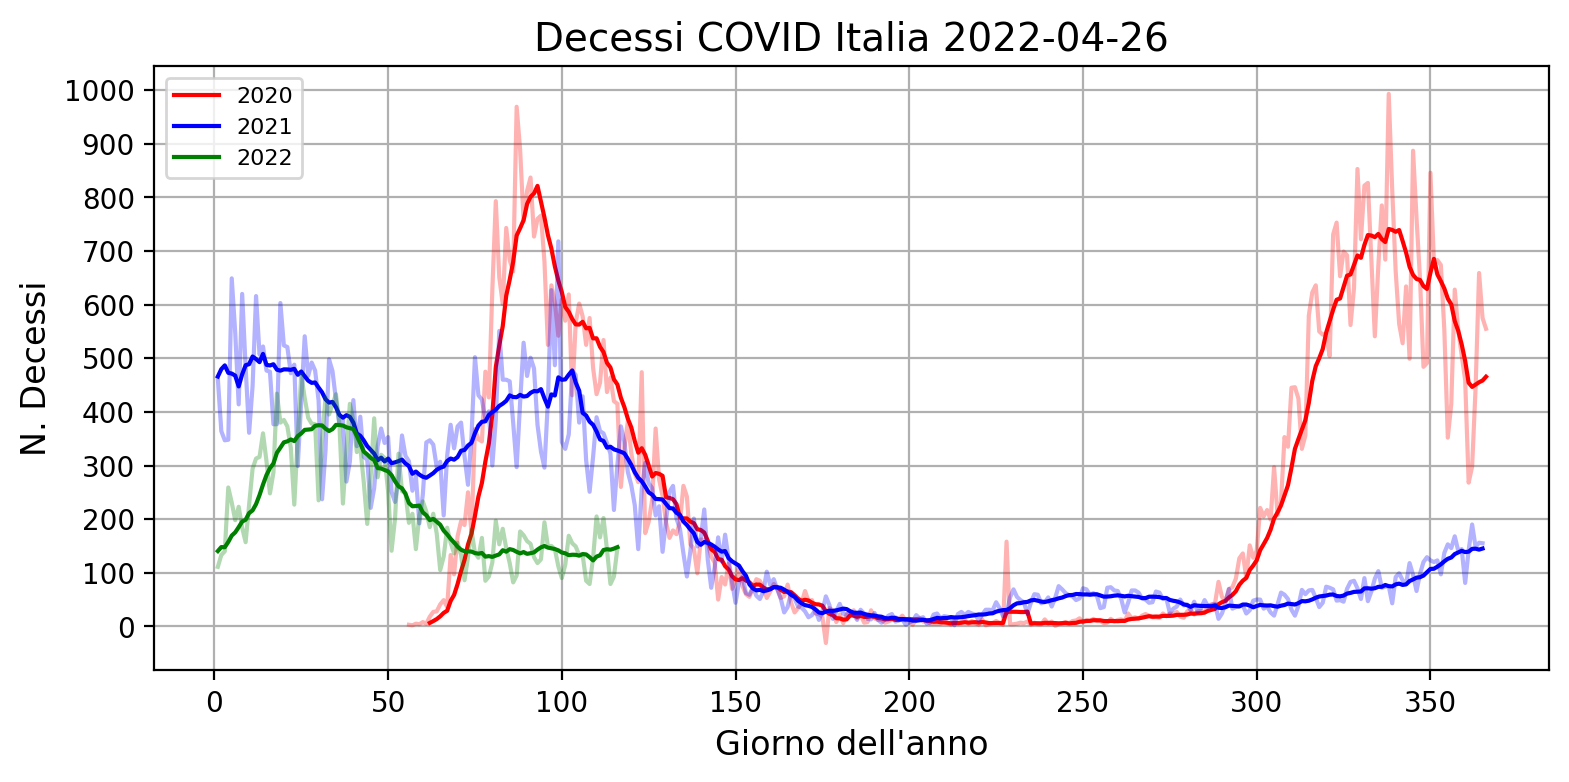

In [57]:
plt.figure(dpi=200,figsize=(9,4))
colors = ["r","b","g"]
i=0
for year in years:
    plt.plot(df_dict[year]["giorno"],df_dict[year]["variazione_deceduti"],alpha=0.3,color=colors[i])
    plt.plot(df_dict[year]["giorno"],df_dict[year]["variazione_deceduti_media_7"],label=year,alpha=1,color=colors[i])
    i+=1
    
plt.title(f"Decessi COVID Italia {oggi}",fontsize=14)
plt.xlabel("Giorno dell'anno",fontsize=12)
plt.ylabel("N. Decessi",fontsize=12)
plt.yticks(np.arange(0,1100,100))
plt.legend(fontsize=8)
plt.savefig(f"./plots/{oggi}/year_comp_decessi.png",bbox_inches="tight")

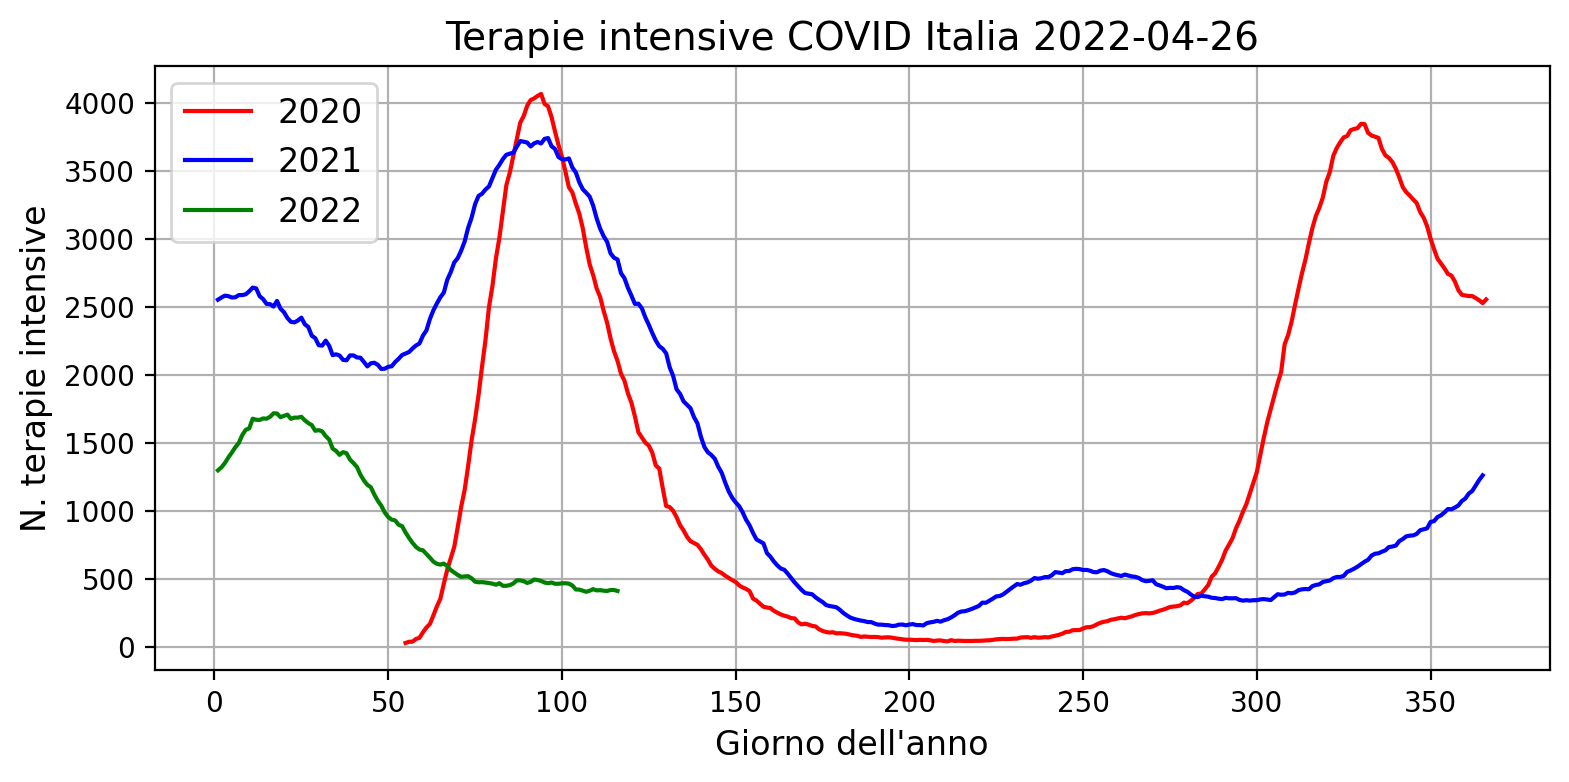

In [58]:
plt.figure(dpi=200,figsize=(9,4))
colors = ["r","b","g"]
i=0
for year in years:
    plt.plot(df_dict[year]["giorno"], df_dict[year]["terapia_intensiva"], alpha=1, color=colors[i], label=year)
    i+=1
plt.xlabel("Giorno dell'anno",fontsize=12)
plt.ylabel("N. terapie intensive",fontsize=12)
plt.title(f"Terapie intensive COVID Italia {oggi}",fontsize=14)
plt.legend()
plt.savefig(f"./plots/{oggi}/year_comp_ti.png",bbox_inches="tight")

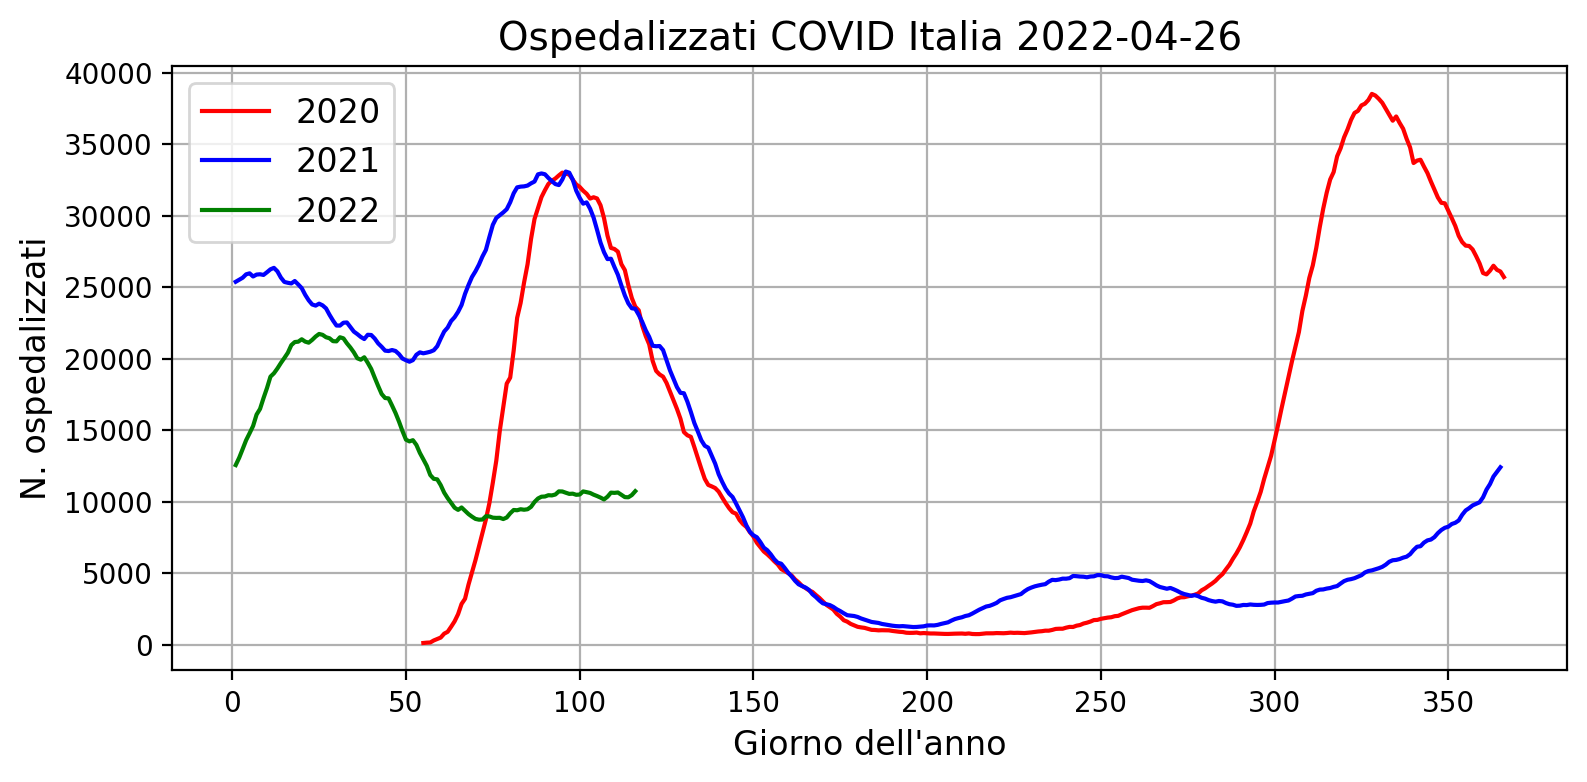

In [59]:
plt.figure(dpi=200,figsize=(9,4))
colors = ["r","b","g"]
i=0
for year in years:
    plt.plot(df_dict[year]["giorno"], df_dict[year]["totale_ospedalizzati"], alpha=1, color=colors[i], label=year)
    i+=1

plt.xlabel("Giorno dell'anno",fontsize=12)
plt.ylabel("N. ospedalizzati",fontsize=12)
plt.title(f"Ospedalizzati COVID Italia {oggi}",fontsize=14)
plt.legend()
plt.savefig(f"./plots/{oggi}/year_comp_hospit.png",bbox_inches="tight")

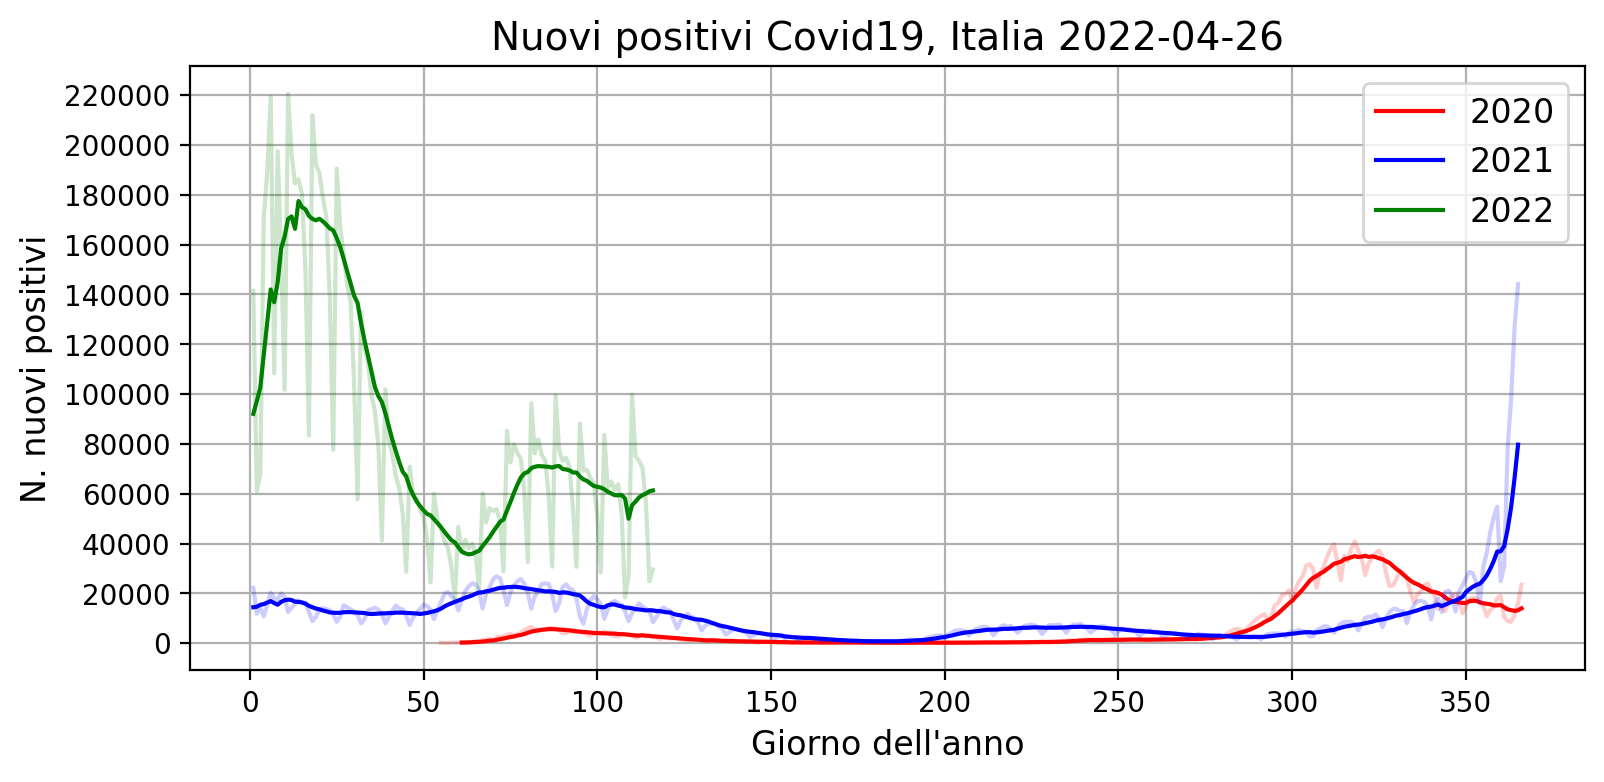

In [61]:
plt.figure(dpi=200,figsize=(9,4))
colors = ["r","b","g"]
i=0
for year in years:
    plt.plot(df_dict[year]["giorno"], df_dict[year]["nuovi_positivi"], alpha=0.2, color=colors[i], label=None)
    plt.plot(df_dict[year]["giorno"], df_dict[year]["nuovi_positivi_media_7"], alpha=1, color=colors[i], label=year)
    i+=1
plt.xlabel("Giorno dell'anno",fontsize=12)
plt.ylabel("N. nuovi positivi",fontsize=12)
plt.yticks(np.arange(0,240000,20000))
plt.title(f"Nuovi positivi Covid19, Italia {oggi}", fontsize=14)
plt.legend()
plt.savefig(f"./plots/{oggi}/year_comp_nuovi_positivi.png", bbox_inches="tight")

In [42]:
df[df["nuovi_positivi"]==np.max(df["nuovi_positivi"])][["giorno","nuovi_positivi"]]

giorno  nuovi_positivi
24  2022-01-11          220532

### Rapporto ISS

In [46]:
df[["giorno","nuovi_positivi"]].head(10)

giorno  nuovi_positivi
0  2022-02-02          118994
1  2022-02-01          133142
2  2022-01-31           57715
3  2022-01-30          104065
4  2022-01-29          137147
5  2022-01-28          143898
6  2022-01-27          155697
7  2022-01-26          167206
8  2022-01-25          190514
9  2022-01-24           77696

In [47]:
df[(df.giorno >= datetime.strptime("2021-11-19","%Y-%m-%d").date()) &
   (df.giorno  < datetime.strptime("2021-12-19","%Y-%m-%d").date())
  ][["giorno","terapia_intensiva","ingressi_terapia_intensiva"]].agg(avg_terapia=("ingressi_terapia_intensiva","sum"))

ingressi_terapia_intensiva
avg_terapia                      1887.0

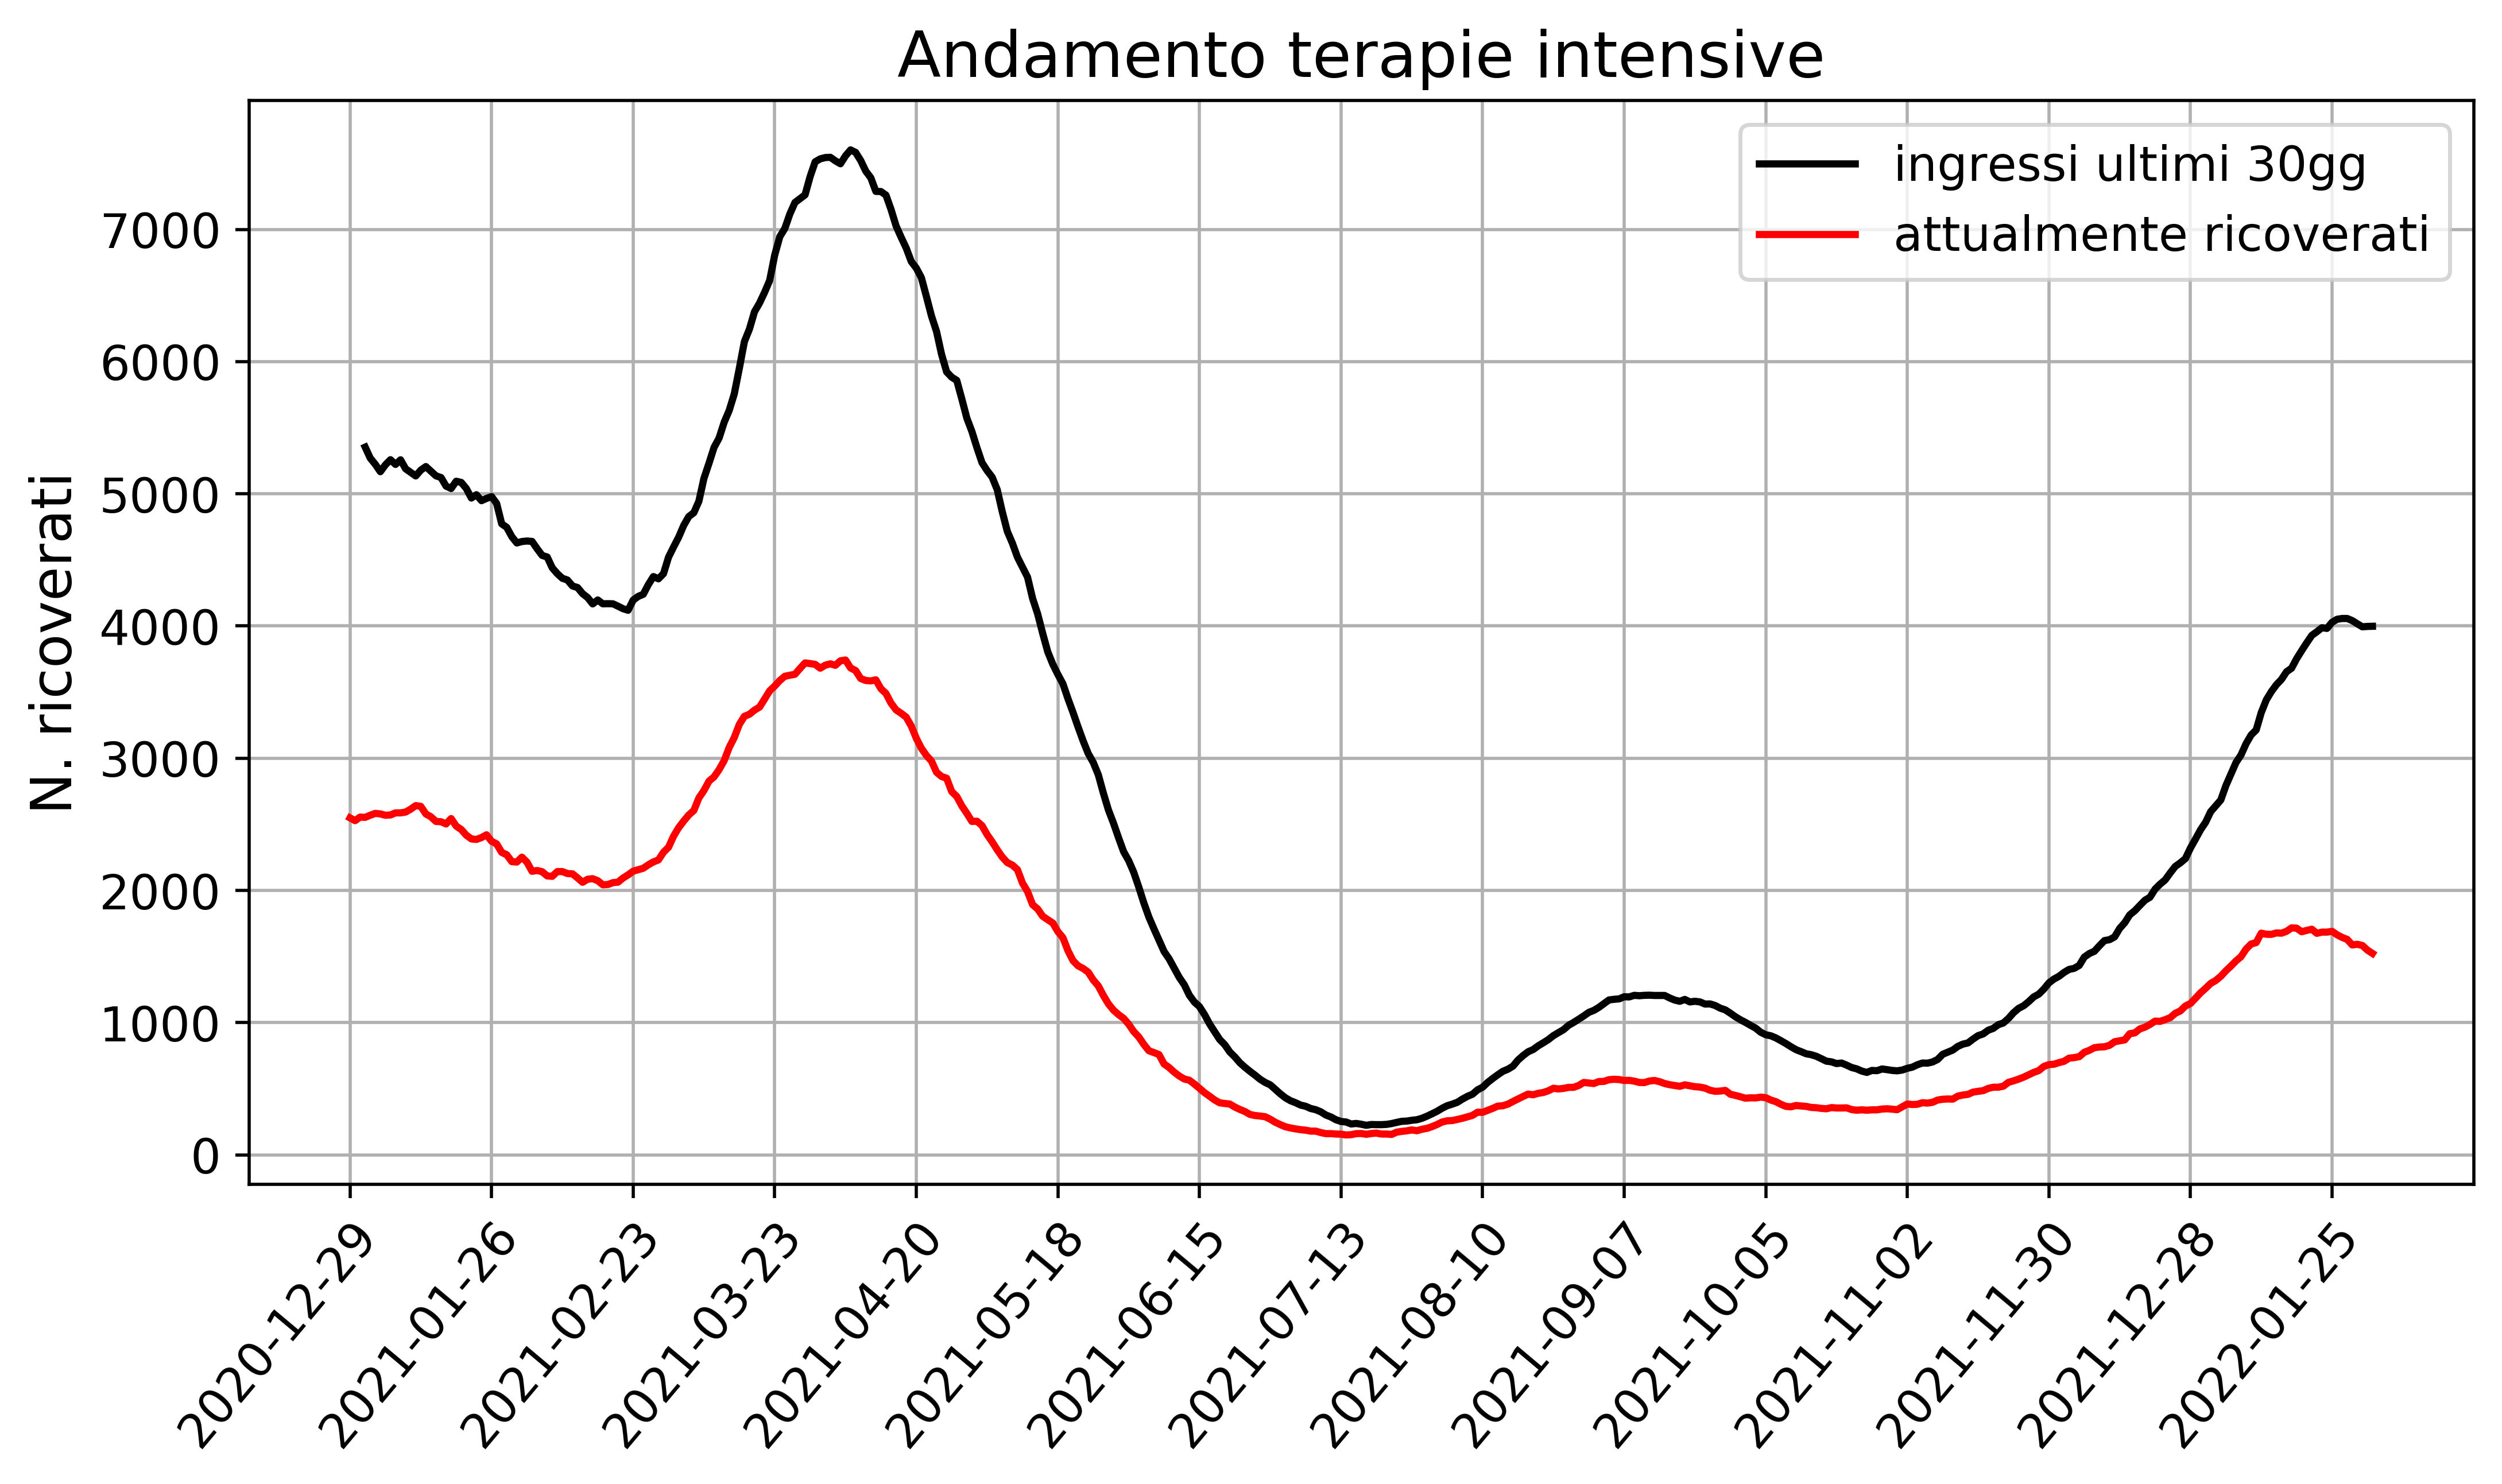

In [48]:
createXYPlot(df,
             y=["ingressi_terapia_intensiva_30","terapia_intensiva"],
             labels=["ingressi ultimi 30gg","attualmente ricoverati"],
             x="giorno",
             colors=["black","red"],
             days_interval=28,
             linewidth=1.8,
             dpis=500,
             plots_folder=plots_folder,
             start_date="2020-12-28",
             title="Andamento terapie intensive",
             ytitle="N. ricoverati"
            )

In [52]:
df[["giorno","ingressi_terapia_intensiva","ingressi_terapia_intensiva_30"]]

giorno  ingressi_terapia_intensiva  ingressi_terapia_intensiva_30
0    2022-02-01                       107.0                         3997.0
1    2022-01-31                       112.0                         3994.0
2    2022-01-30                        95.0                         4017.0
3    2022-01-29                       118.0                         4041.0
4    2022-01-28                       126.0                         4057.0
5    2022-01-27                       125.0                         4057.0
6    2022-01-26                       123.0                         4051.0
7    2022-01-25                       131.0                         4028.0
8    2022-01-24                       101.0                         3982.0
9    2022-01-23                       132.0                         3987.0
10   2022-01-22                       121.0                         3957.0
11   2022-01-21                       148.0                         3929.0
12   2022-01-20                       155.0                         3873.0
13   2022-01-19                       134.0                         3814.0
14   2022-01-18                       150.0                         3753.0
15   2022-01-17                       122.0                         3681.0
16   2022-01-16                       128.0                         3654.0
17   2022-01-15                       141.0                         3596.0
18   2022-01-14                       136.0                         3556.0
19   2022-01-13                       156.0                         3504.0
20   2022-01-12                       156.0                         3441.0
21   2022-01-11                       185.0                         3345.0
22   2022-01-10                       114.0                         3214.0
23   2022-01-09                       142.0                         3176.0
24   2022-01-08                       154.0                         3110.0
25   2022-01-07                       120.0                         3025.0
26   2022-01-06                       177.0                         2967.0
27   2022-01-05                       132.0                         2879.0
28   2022-01-04                       153.0                         2792.0
29   2022-01-03                       103.0                         2684.0
30   2022-01-02                       104.0                         2640.0
31   2022-01-01                       135.0                         2596.0
32   2021-12-31                       119.0                         2516.0
33   2021-12-30                       134.0                         2459.0
34   2021-12-29                       126.0                         2389.0
35   2021-12-28                       119.0                         2321.0
36   2021-12-27                       100.0                         2241.0
37   2021-12-26                        85.0                         2209.0
38   2021-12-25                       106.0                         2182.0
39   2021-12-24                       102.0                         2133.0
40   2021-12-23                        93.0                         2080.0
41   2021-12-22                        92.0                         2048.0
42   2021-12-21                        96.0                         2010.0
43   2021-12-20                        73.0                         1949.0
44   2021-12-19                        78.0                         1926.0
45   2021-12-18                        95.0                         1887.0
46   2021-12-17                        70.0                         1847.0
47   2021-12-16                       101.0                         1816.0
48   2021-12-15                        84.0                         1756.0
49   2021-12-14                        93.0                         1713.0
50   2021-12-13                        60.0                         1649.0
51   2021-12-12                        54.0                         1628.0
52   2021-12-11                   